## Mini-Proyecto 1 - Análisis Mutivariado para la computación afectiva

---



**Autores:**  

*   Santiago Torres Velásquez
*   Santiago Narváez Toro

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

## 1. Descripción

La emoción es un proceso psicofisiológico desencadenado por la percepción consciente e inconsciente de objetos o situaciones. Las emociones están relacionadas con el estado de ánimo, la personalidad, y la motivación, y desempeñan un papel importante en la comunicación humana, ya sea verbalmente o a través de señales no verbales como expresiones faciales y gestos.

La mayoría de los sistemas de interacción humano-computadora carecen de inteligencia emocional y no pueden identificar los estados emocionales humanos ni tomar acciones adecuadas en consecuencia. La computación afectiva busca abordar esta deficiencia al detectar señales emocionales durante la interacción humano-computadora y generar respuestas emocionales.

La evaluación de las emociones generalmente se realiza mediante el análisis de expresiones emocionales y señales fisiológicas de los usuarios. Los estudios se han centrado principalmente en analizar las expresiones faciales y el habla para determinar el estado emocional de una persona, aunque también se reconoce que las señales fisiológicas, originadas en el sistema nervioso central y periférico, contienen información emocional que puede ser utilizada en la evaluación de las emociones.

## 2. Actividad de aprendizaje
1. Se requiere construir un framework que permita procesar y caracterizar las señales fisiológicas para agruparlas en estados emocionales. Para ello se trabajara con la base de datos DEAPdataset, la cual es un conjunto de datos para el analisis de emociones usando señales de eeg, fisiológicas y de video

In [ ]:
#Descarga los archivos de todas las personas

#https://drive.google.com/drive/folders/1kKRLehNqEU8Wh5GMwBc-DA1NsOM8y_es

!gdown '1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3'
!gdown '1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22'
!gdown '1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD'
!gdown '1cNMil1P60z-XrqExnnKvmggmXWhI3glZ'

Downloading...
From: https://drive.google.com/uc?id=1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3
To: /content/s17.mat
100% 80.7M/80.7M [00:01<00:00, 78.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cBN0CYdrsUsVO77PyNq-Jkyh5pc0FI22
To: /content/s16.mat
100% 80.8M/80.8M [00:00<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fu3HL-cB64lTfuZS8iPhIfaJIsl1OszD
To: /content/s15.mat
100% 80.7M/80.7M [00:00<00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cNMil1P60z-XrqExnnKvmggmXWhI3glZ
To: /content/s14.mat
100% 80.6M/80.6M [00:00<00:00, 168MB/s]


2. El objetivo de este mini-proyecto es realizar la caracterizacion de los estados emocionales de la siguiente manera:
• En los equipos de trabajo, se deben escoger mínimo 3 características por cada tipo de señal en la base de datos. La siguiente tabla muestra las características mas relevantes para extraer de un proceso
emocional de las cuales debe escoger dicha cantidad por cada grupo.

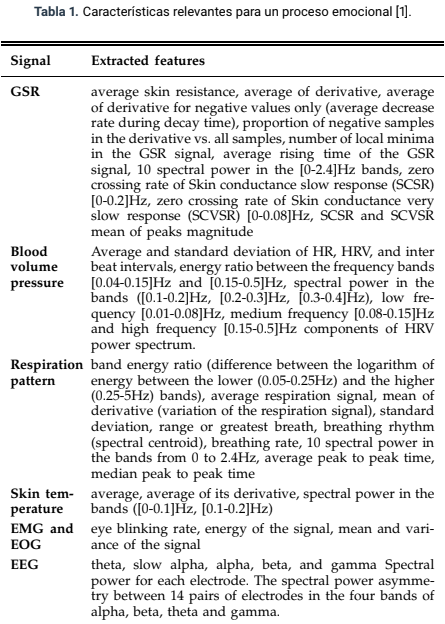

Se debe crear un modulo en Python que realice la extracción de características de tal forma que para cada uno de los 40 videos que inducen estados emocionales, se construya una matriz de la forma ${\bf{X}}\in\mathbb{R}^{N\times D}$, donde N es el número de observaciones (en este caso las realizaciones emocionales), y D es el
número de características resultantes en el proceso de extracción.

In [ ]:
# Cargar el archivo .mat
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import pandas as pd

# Carga de las señales de una sola persona
datosP1 = sc.loadmat('s17.mat')
signals1 = datosP1['data']
etiquetas1 = datosP1['labels']

datosP2 = sc.loadmat('s16.mat')
signals2 = datosP2['data']
etiquetas2 = datosP2['labels']

datosP3 = sc.loadmat('s15.mat')
signals3 = datosP3['data']
etiquetas3 = datosP3['labels']

datosP4 = sc.loadmat('s14.mat')
signals4 = datosP4['data']
etiquetas4 = datosP4['labels']
# Esto arrojará un nd array de n_video * id_signal * Ntimepoints

personas = [signals1,signals2,signals3,signals4]

### Extracción de las características para la GSR

- Tiempo promedio de subida de la GSR: El tiempo que lleva que una SCR alcance su amplitud máxima y el tiempo que tarda en volver a la línea de base pueden proporcionar información sobre la intensidad y la duración de la respuesta emocional.

- Promedio de la Derivada Solo para Valores Negativos: Centrarse en los valores negativos de la derivada puede ayudar a capturar respuestas específicas de GSR que pueden estar relacionadas con cambios emocionales.

- Potencia Espectral en Bandas de 0-2.4 Hz: El análisis en el dominio de la frecuencia puede revelar patrones relacionados con las respuestas emocionales. Analizar la potencia espectral en este rango de frecuencia puede ayudar a identificar firmas emocionales específicas.

Estas características puede proporcionar un buen equilibrio entre capturar tendencias generales y respuestas emocionales específicas en los datos.

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA GSR.

def caracteristicas_GSR (gsr_data):
  #CÁLCULO PARA LA GSR.

  # Umbral para detectar una respuesta galvánica de la piel (GSR).
  umbral = 100

  # Encuentra los índices donde la GSR cruza el umbral (respuesta galvánica).
  indices_gsr = np.where(gsr_data > umbral)[0]

  # Inicializa una lista para almacenar los tiempos de subida.
  tiempos_subida = []

  # Calcula el tiempo promedio de subida entre respuestas galvánicas.
  for i in range(1, len(indices_gsr)):
      tiempo_subida = indices_gsr[i] - indices_gsr[i - 1]
      tiempos_subida.append(tiempo_subida)

  # Calcula el tiempo promedio de subida
  tiempo_promedio_subida = np.mean(tiempos_subida)

  # CÁLCULO PARA EL PROMEDIO DE LA DERIVADA PARA VALORES NEGATIVOS.

  # Calcula la derivada de la señal de GSR.
  gsr_derivative = np.diff(gsr_data)

  # Calcula el promedio de la derivada solo para valores negativos.
  average_derivative_negative = np.mean(gsr_derivative[gsr_derivative < 0])


  # CÁLCULO POTENCIA ESPECTRAL EN BANDAS 0-2.4 Hz.
  b, a = signal.butter(4, 2.4/128, 'lowpass', analog=False)
  filtered = signal.lfilter(b, a, gsr_data)

  #Se realiza la fft a la señal filtrada
  gsr_ftt = np.fft.fft(filtered)
  frecuencias_gsr = np.fft.fftfreq(len(gsr_ftt), 1.0 / 128)

  # Encuentra los índices de las frecuencias_gsr en la banda de 0 a 2.4 Hz
  indices = np.where((frecuencias_gsr >= 0.) & (frecuencias_gsr <= 2.4))[0]

  # Calcula las potencias espectrales en la banda de 0 a 2.4 Hz
  potencias_banda = np.abs(gsr_ftt[indices])**2

  # Toma las 10 primeras potencias
  indices_ten = np.argsort(potencias_banda)[::-1][:10]
  potencias_ten = potencias_banda[indices_ten]
  frecuencia_ten = frecuencias_gsr[indices][indices_ten]

  vector_gsr = np.array([tiempo_promedio_subida, average_derivative_negative])
  vector_gsr = np.hstack((vector_gsr, potencias_ten, frecuencia_ten))

  return vector_gsr

Estos datos proporcionan información valiosa sobre la señal de GSR y pueden ser indicativos de la presencia de respuestas emocionales. Sin embargo, la interpretación precisa de estos valores en términos de emociones específicas requeriría más contexto y posiblemente la comparación con datos de referencia o un análisis multimodal que incluya otras señales fisiológicas.


### Extracción de las características para la presión y volumen de la sangre

- Promedio y Desviación Estándar del Pulso: Estas dos características proporcionan información básica sobre la frecuencia cardíaca y su variabilidad. El promedio del pulso puede indicar el nivel de activación general, mientras que la desviación estándar refleja la variabilidad del ritmo cardíaco. Ambas pueden ser útiles para evaluar la actividad cardiovascular en respuesta a las emociones.

- Ratio de Energía entre Bandas de Frecuencia 0.04-0.15 Hz y 0.15-0.5 Hz: Este índice refleja la distribución de energía en diferentes bandas de frecuencia en el espectro de HRV. La relación entre la baja frecuencia (LF) y la alta frecuencia (HF) se ha utilizado para evaluar el equilibrio entre el sistema nervioso simpático y parasimpático. Esta relación puede proporcionar información sobre la respuesta del sistema nervioso autónomo a las emociones.

- Potencia Espectral en las bandas [0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz: La potencia espectral en esta banda de frecuencia específica se ha asociado con la actividad del sistema nervioso parasimpático y puede ser relevante para evaluar la influencia de las emociones en la regulación cardíaca. Un aumento en esta potencia podría indicar una respuesta parasimpática dominante en ciertas situaciones emocionales.

Estas características pueden dar información valiosa de cómo la presión y el volumen están relacionadas con las respuestas emocionales.

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA PRESIÓN Y VOLUMEN EN LA SANGRE.

def caracteristicas_HRV (hrv_data):

  matriz_hrv = np.empty((0,6)) # Inicialmente una matriz vacía

  # 1. Promedio y Desviación Estándar del Pulso
  promedio_pulso = np.mean(hrv_data)
  desviacion_estandar_pulso = np.std(hrv_data)

  # 2. Ratio de Energía entre Bandas de Frecuencia 0.04-0.15 Hz y 0.15-0.5 Hz

  b, a = signal.butter(4, [0.04/128, 0.5/128], 'bandpass', analog=False)
  filtered = signal.lfilter(b, a, hrv_data)

  hrv_ftt = np.fft.fft(filtered)
  frecuencias_hrv = np.fft.fftfreq(len(hrv_ftt), 1.0 / 128)

  low_freq_band_ind = np.where((frecuencias_hrv >= 0.04) & (frecuencias_hrv <= 0.15))[0]
  high_freq_band_ind = np.where((frecuencias_hrv > 0.15) & (frecuencias_hrv <= 0.5))[0]

  potencias_low_band = np.abs(hrv_ftt[low_freq_band_ind])**2
  potencias_high_band = np.abs(hrv_ftt[high_freq_band_ind])**2

  ratio_energia_lf_hf = np.sum(potencias_low_band) / np.sum(potencias_high_band)

  # 3. Potencia Espectral en las bandas [0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz
  banda_01_02 = np.where((frecuencias_hrv >= 0.1) & (frecuencias_hrv <= 0.2))[0]
  banda_02_03 = np.where((frecuencias_hrv > 0.2) & (frecuencias_hrv <= 0.3))[0]
  banda_03_04 = np.where((frecuencias_hrv > 0.3) & (frecuencias_hrv <= 0.4))[0]

  potencia_banda_01_02 = np.sum(np.abs(hrv_ftt[banda_01_02])**2)/ (len(hrv_data) / 128)
  potencia_banda_02_03 = np.sum(np.abs(hrv_ftt[banda_02_03])**2)/ (len(hrv_data) / 128)
  potencia_banda_03_04 = np.sum(np.abs(hrv_ftt[banda_03_04])**2)/ (len(hrv_data) / 128)

  vector_hrv = np.array([promedio_pulso, desviacion_estandar_pulso, ratio_energia_lf_hf, potencia_banda_01_02, potencia_banda_02_03, potencia_banda_03_04])
  return vector_hrv

#print (xHRV)

Si bien estos resultados ofrecen información sobre la variabilidad cardíaca y la actividad autonómica, no proporcionan indicios directos de emociones. Para comprender mejor las relaciones entre estas características, es importante realizar análisis adicionales.

### Extracción de las características para el patrón de respiración

- Diferencia entre el Logaritmo de Energía entre las Bandas Bajas y Altas: Esta característica puede proporcionar información sobre cómo se distribuye la energía en diferentes bandas de frecuencia en la señal de respiración. Un valor alto en esta característica podría indicar una mayor influencia de la respiración lenta y profunda (baja frecuencia) en comparación con la respiración rápida y superficial (alta frecuencia). Esto podría estar relacionado con estados emocionales de relajación y calma versus estados emocionales de excitación.

- Frecuencia Respiratoria: La desviación estándar de la respiración se refiere a la variabilidad en la frecuencia respiratoria de una persona, y esta variabilidad puede estar relacionada con cambios emocionales.

- 10 Potencias Espectrales en Bandas de 0 a 2.4 Hz: Estas potencias espectrales en diferentes bandas de frecuencia pueden proporcionar información sobre la distribución de energía en la señal de respiración. Dado que abarcan una amplia gama de frecuencias, pueden ayudar a capturar diferentes patrones de respiración asociados con emociones. Por ejemplo, las frecuencias más bajas pueden estar relacionadas con respiración lenta y profunda, mientras que las frecuencias más altas pueden estar relacionadas con respiración rápida y superficial.

Estas tres características pueden ser útiles para analizar cómo el patrón de respiración está relacionado con las respuestas emocionales.

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA RESPIRACIÓN.
def caracteristicas_RESPIRACION(respiracion_data):

  b, a = signal.butter(4, [0.05/128, 5./128], 'bandpass', analog=False)
  filtered = signal.lfilter(b, a, respiracion_data)

  # 1. Band Energy Ratio (Diferencia entre el Logaritmo de Energía entre las Bandas Bajas y Altas)
  respiracion_fft = np.fft.fft(filtered)
  frecuencias_respiracion = np.fft.fftfreq(len(respiracion_fft), 1.0 / 128)

  low_band = np.where((frecuencias_respiracion >= 0.05) & (frecuencias_respiracion <= 0.25))[0]
  high_band = np.where((frecuencias_respiracion > 0.25) & (frecuencias_respiracion <= 5))[0]

  energia_low = np.sum(np.abs(respiracion_fft[low_band]**2))
  energia_high = np.sum(np.abs(respiracion_fft[high_band]**2))

  band_energy_ratio = np.log(energia_low) - np.log(energia_high)

  # 2. Desviación estándar
  std_respiracion = np.std(respiracion_data)

  # 3. 10 Spectral Power in Bands from 0 to 2.4Hz (10 Potencias Espectrales en Bandas de 0 a 2.4 Hz)
  respiracion_fft = np.fft.fft(filtered)
  frecuencias_respiracion = np.fft.fftfreq(len(respiracion_fft), 1.0 / 128)

  # Encuentra los índices de las frecuencias_respiracion en la banda de 0 a 2.4 Hz
  indices = np.where((frecuencias_respiracion >= 0.) & (frecuencias_respiracion <= 2.4))[0]

  # Calcula las potencias espectrales en la banda de 0 a 2.4 Hz
  potencias_banda = np.abs(respiracion_fft[indices])**2

  # Toma las 10 primeras potencias
  indices_ten_respiracion = np.argsort(potencias_banda)[::-1][:10]
  potencias_ten_respiracion = potencias_banda[indices_ten_respiracion]
  frecuencia_ten_respiracion = frecuencias_respiracion[indices_ten_respiracion]

  vector_respiracion = np.array([band_energy_ratio, std_respiracion])
  vector_respiracion = np.hstack((vector_respiracion, potencias_ten_respiracion, frecuencia_ten_respiracion))

  return vector_respiracion

En conjunto, estos resultados sugieren que la señal de respiración puede mostrar características asociadas al estado anímico de la persona. Estos resultados son indicativos pero no proporcionan una evaluación definitiva de estados emocionales específicos. La interpretación precisa requerirá realizar análisis adicionales para relacionar estas características con estados emocionales.

### Extracción de las características para la temperatura de la piel

- Promedio de la temperatura de la piel: La temperatura de la piel puede variar en respuesta a cambios fisiológicos y emocionales. Cuando una persona experimenta emociones intensas, como el enojo o el miedo, su sistema nervioso autónomo puede desencadenar respuestas físicas, como la sudoración o la vasoconstricción de los vasos sanguíneos de la piel, lo que puede influir en la temperatura de la piel. Por lo tanto, el seguimiento del promedio de la temperatura de la piel puede revelar patrones que se asocian con emociones específicas.

- Promedio de la derivada de la temperatura de la piel: La derivada de la temperatura de la piel se refiere a la tasa de cambio en la temperatura de la piel con el tiempo. Puede ser especialmente útil para detectar cambios rápidos en la respuesta emocional de una persona. Por ejemplo, un aumento abrupto en la temperatura de la piel seguido de una rápida disminución podría estar relacionado con una emoción como el susto o la sorpresa. Analizar la derivada de la temperatura de la piel puede ayudar a identificar picos emocionales en tiempo real.

- Espectro de poencia en las bandas ([0-0.1]Hz, [0.1-0.2]Hz): El espectro de potencia se refiere a la distribución de la energía en diferentes bandas de frecuencia en las señales fisiológicas. El análisis de las bandas de frecuencia [0-0.1]Hz y [0.1-0.2]Hz puede ser relevante porque estas frecuencias están asociadas con la actividad del sistema nervioso autónomo. Variaciones en la actividad de estas bandas pueden estar relacionadas con diferentes estados emocionales. Por ejemplo, un aumento en la actividad de [0.1-0.2]Hz podría indicar una respuesta emocional específica.

Estas tres características pueden ser útiles para analizar cómo la temperatura de la piel está relacionada con las respuestas emocionales.

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA TEMPERATURA DE LA PIEL.

def caracteristicas_TEMP(temperatura_data):

  #1. Calcular el Promedio
  promedio_temp = np.mean(temperatura_data)

  #2. Calcular el Promedio de la derivada
  derivada = np.diff(temperatura_data)
  promedio_temp_derivada = np.mean(derivada)

  #3. Calcular el Espectro de potencia
  b, a = signal.butter(4, 0.2/128, 'lowpass', analog=False)
  filtered = signal.lfilter(b, a, temperatura_data)

  temp_ftt = np.fft.fft(filtered)
  frecuencias_temp = np.fft.fftfreq(len(temp_ftt), 1.0 / 128)

  # Definir las bandas de frecuencia [0-0.1]Hz y [0.1-0.2]Hz
  banda_low_temp = np.where((frecuencias_temp >= 0) & (frecuencias_temp <= 0.1))[0]
  banda_high_temp = np.where((frecuencias_temp > 0.1) & (frecuencias_temp <= 0.2))[0]

  # Calcular la Espectro de potencia en las bandas [0-0.1]Hz y [0.1-0.2]Hz
  potencias_banda_low_temp = np.sum(np.abs(temp_ftt[banda_low_temp])**2)/ (len(temperatura_data) / 128)
  potencias_banda_high_temp = np.sum(np.abs(temp_ftt[banda_high_temp])**2)/ (len(temperatura_data) / 128)

  #Matriz de 40 videos (filas) x 4 Caracteristicas de la temperatura
  vector_temp = np.array([promedio_temp,promedio_temp_derivada,potencias_banda_low_temp,potencias_banda_high_temp])
  return vector_temp

#print (xTEMP)

El análisis de la temperatura de la piel y sus derivadas, así como el espectro de potencia en bandas de frecuencia específicas, puede proporcionar pistas sobre las respuestas emocionales de una persona. Sin embargo, es importante destacar que el análisis de estas señales es complejo y requiere un contexto y una interpretación adecuados. Además, las respuestas emocionales varían de una persona a otra, por lo que se necesita una comprensión personalizada para una identificación precisa de las emociones.

### Extracción de las características para la EMG y la EOG

- Promedio de la señal: El promedio de la señal EMG puede utilizarse para obtener una estimación general de la actividad muscular en un cierto período de tiempo. Si bien no es una medida específica de emociones, cambios en la actividad muscular pueden estar relacionados con reacciones emocionales. Por ejemplo, el aumento en la actividad muscular facial podría estar asociado con emociones como la sonrisa en respuesta a la felicidad o el fruncimiento de cejas en respuesta a la ira o la frustración.

- Varianza de la señal: La varianza de la señal EMG puede proporcionar información sobre la variabilidad en la actividad muscular. Una mayor varianza podría sugerir cambios en la tensión muscular que podrían estar relacionados con emociones. Por ejemplo, durante situaciones de estrés, la actividad muscular puede volverse más variable debido a la tensión muscular.

- Energía de la señal: La energía de la señal EMG es una medida de la cantidad de energía contenida en la señal en un cierto período de tiempo. Podría utilizarse para identificar momentos de alta actividad muscular que podrían estar relacionados con reacciones emocionales intensas, como el aumento repentino de la actividad muscular en respuesta a una sorpresa o un sobresalto.

Estas tres características pueden ser útiles para analizar cómo la EMG y la EOG están relacionadas con las respuestas emocionales.

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA zEMG.
def caracteristicas_zEMG(zEMG_data):

  # 1. Calcular el Promedio
  promedio_zEMG = np.mean(zEMG_data)

  # 2. Desviación estándar
  var_zEMG = np.var(zEMG_data)

  # 3. Energía de la señal
  energia_zEMG = np.sum(np.square(zEMG_data))
  vector_zEMG = np.array([promedio_zEMG,var_zEMG,energia_zEMG])

  return vector_zEMG

#print (xzEMG)

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA tEMG.
def caracteristicas_tEMG(tEMG_data):

  # 1. Calcular el Promedio
  promedio_tEMG = np.mean(tEMG_data)

  # 2. Desviación estándar
  var_tEMG = np.var(tEMG_data)

  # 3. Energía de la señal
  energia_tEMG = np.sum(np.square(tEMG_data))
  vector_tEMG = np.array([promedio_tEMG,var_tEMG,energia_tEMG])

  return vector_tEMG

#print (xtEMG)

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA hEOG.
def caracteristicas_hEOG(hEOG_data):

  # 1. Calcular el Promedio
  promedio_hEOG = np.mean(hEOG_data)

  # 2. Desviación estándar
  var_hEOG = np.var(hEOG_data)

  # 3. Energía de la señal
  energia_hEOG = np.sum(np.square(hEOG_data))
  vector_hEOG = np.array([promedio_hEOG,var_hEOG,energia_hEOG])

  return vector_hEOG

#print (xhEOG)

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA vEOG.
def caracteristicas_vEOG(vEOG_data):

  # 1. Calcular el Promedio
  promedio_vEOG = np.mean(vEOG_data)

  # 2. Desviación estándar
  var_vEOG = np.var(vEOG_data)

  # 3. Energía de la señal
  energia_vEOG = np.sum(np.square(vEOG_data))
  vector_vEOG = np.array([promedio_vEOG,var_vEOG,energia_vEOG])

  return vector_vEOG

#print (xvEOG)

El promedio, la varianza y la energía de la señal EMG pueden ser útiles para caracterizar la actividad muscular en relación con las emociones, pero generalmente se utilizan en conjunto con otras medidas y técnicas para lograr una detección más precisa y confiable de emociones.

### Extracción de las características para la EEG

- Ondas Gamma: Las ondas Gamma son las de mayor frecuencia en la actividad cerebral, oscilando típicamente entre 30 y 100 Hz. Estas ondas están asociadas con procesos cognitivos superiores, como la percepción, la atención y la memoria de trabajo. La detección de aumentos significativos en la actividad de las ondas Gamma en regiones específicas del cerebro puede indicar estados emocionales como el estado de alerta, la concentración o incluso la excitación. En situaciones emocionales intensas, como el miedo o la euforia, se pueden observar cambios en las ondas Gamma.

- Ondas Beta: Las ondas Beta tienen una frecuencia de alrededor de 12 a 30 Hz y están relacionadas con la actividad mental activa y el estado de vigilia. Las ondas Beta pueden ser útiles para detectar emociones como el estrés, la ansiedad o la preocupación. Aumentos significativos en la actividad de las ondas Beta, especialmente en regiones como la corteza prefrontal, pueden indicar actividad mental relacionada con emociones.

- Ondas Alfa: Las ondas Alfa tienen una frecuencia de aproximadamente 8 a 12 Hz y se asocian comúnmente con estados de relajación y tranquilidad. La detección de un aumento en las ondas Alfa y su dominancia en la actividad cerebral puede sugerir que una persona está experimentando emociones positivas, como la calma, la relajación o incluso la felicidad.

Con la extracción de estas características de la EEG, incluyendo las ondas Gamma, Beta y Alfa, pueden proporcionar información valiosa sobre la actividad cerebral y como están relacionadas con las respuestas emocionales.

In [ ]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA EEG.

def caracteristicas_EEG(EEG_data):

  #CANAL Fz (#19)

  #1. Gamma Waves [30-100]Hz
  bG, aG = signal.butter(4, [30/128, 100/128], 'bandpass', analog=False)
  filtered = signal.lfilter(bG, aG, EEG_data)

  Fz_gamma_fft = np.fft.fft(filtered)
  Fz_gamma_freq = np.fft.fftfreq(len(Fz_gamma_fft), 1.0 / 128)

  # Definir las bandas de frecuencia [30-100]Hz
  Fz_gamma_band = np.where((Fz_gamma_freq >= 30) & (Fz_gamma_freq <= 100))[0]

  # Calcular la Espectro de potencia en la banda [30-100]Hz
  potencia_Fz_gamma_band = np.sum(np.abs(Fz_gamma_fft[Fz_gamma_band])**2) / (len(EEG_data) / 128)

  #2. Beta Waves [12-30]Hz
  bB, aB = signal.butter(4, [12/128, 30/128], 'bandpass', analog=False)
  filtered = signal.lfilter(bB, aB, EEG_data)

  Fz_beta_fft = np.fft.fft(filtered)
  Fz_beta_freq = np.fft.fftfreq(len(Fz_beta_fft), 1.0 / 128)

  # Definir las bandas de frecuencia [12-30]Hz
  Fz_beta_band = np.where((Fz_beta_freq >= 12) & (Fz_beta_freq <= 30))[0]

  # Calcular la Espectro de potencia en la banda [12-30]Hz
  potencia_Fz_beta_band = np.sum(np.abs(Fz_beta_fft[Fz_beta_band])**2)/ (len(EEG_data) / 128)

  #3. Alpha Waves [8-12]Hz
  bA, aA = signal.butter(4, [8/128, 12/128], 'bandpass', analog=False)
  filtered = signal.lfilter(bA, aA, EEG_data)

  Fz_alpha_fft = np.fft.fft(filtered)
  Fz_alpha_freq = np.fft.fftfreq(len(Fz_alpha_fft), 1.0 / 128)

  # Definir las bandas de frecuencia [8-12]Hz
  Fz_alpha_band = np.where((Fz_alpha_freq >= 8) & (Fz_alpha_freq <= 12))[0]

  # Calcular la Espectro de potencia en la banda [8-12]Hz
  potencia_Fz_alpha_band = np.sum(np.abs(Fz_alpha_fft[Fz_alpha_band])**2)/ (len(EEG_data) / 128)

  vector_EEG = np.array([potencia_Fz_gamma_band,potencia_Fz_beta_band,potencia_Fz_alpha_band])

  return vector_EEG

Es importante tener en cuenta que el análisis de estas señales en el contexto de la identificación de emociones es una tarea compleja y requiere un enfoque interdisciplinario que involucre un procesamiento de señales más a detalle. Además, la interpretación de estos datos debe realizarse cuidadosamente, ya que las respuestas emocionales pueden variar ampliamente entre individuos.

### Generando el dataframe

In [ ]:
# Se define el caracterizador, este lo que hace es recibir cada uno de los vectores generados previamente y hacer una concatenación vertical (una persona).

def caracterizadorDEAP(signals,i):

  # Declaración de cada uno de los vectores (vacío).
  xGSR = np.empty((0,22))
  xHRV = np.empty((0,6))
  xRESPIRATION = np.empty((0,22))
  xTEMP = np.empty((0,4))
  xzEMG = np.empty((0,3))
  xtEMG = np.empty((0,3))
  xhEOG = np.empty((0,3))
  xvEOG = np.empty((0,3))

  xEEG_Fz = np.empty((0,3))
  xEEG_Cz = np.empty((0,3))
  xEEG_Pz = np.empty((0,3))
  xEEG_O1 = np.empty((0,3))
  xEEG_T7 = np.empty((0,3))

  # Asociación del vector vacío al valor obtenido y concatenación vertical.
  xGSR_aux = caracteristicas_GSR(signals[i,36,:])
  xGSR = np.vstack((xGSR, xGSR_aux))

  xHRV_aux = caracteristicas_HRV(signals[i,38,:])
  xHRV = np.vstack((xHRV, xHRV_aux))

  xRESPIRATION_aux = caracteristicas_RESPIRACION(signals[i,37,:])
  xRESPIRATION = np.vstack((xRESPIRATION, xRESPIRATION_aux))

  xTEMP_aux = caracteristicas_TEMP(signals[i,39,:])
  xTEMP = np.vstack((xTEMP, xTEMP_aux))

  xzEMG_aux = caracteristicas_zEMG(signals[i,34,:])
  xzEMG = np.vstack((xzEMG, xzEMG_aux))

  xtEMG_aux = caracteristicas_tEMG(signals[i,35,:])
  xtEMG = np.vstack((xtEMG, xtEMG_aux))

  xhEOG_aux = caracteristicas_hEOG(signals[i,32,:])
  xhEOG = np.vstack((xhEOG, xhEOG_aux))

  xvEOG_aux = caracteristicas_vEOG(signals[i,33,:])
  xvEOG = np.vstack((xvEOG, xvEOG_aux))

  xEEG_Fz_aux = caracteristicas_EEG(signals[i,18,:])
  xEEG_Fz = np.vstack((xEEG_Fz, xEEG_Fz_aux))

  xEEG_Cz_aux = caracteristicas_EEG(signals[i,23,:])
  xEEG_Cz = np.vstack((xEEG_Cz, xEEG_Cz_aux))

  xEEG_Pz_aux = caracteristicas_EEG(signals[i,15,:])
  xEEG_Pz = np.vstack((xEEG_Pz, xEEG_Pz_aux))

  xEEG_O1_aux = caracteristicas_EEG(signals[i,13,:])
  xEEG_O1 = np.vstack((xEEG_O1, xEEG_O1_aux))

  xEEG_T7_aux = caracteristicas_EEG(signals[i,7,:])
  xEEG_T7 = np.vstack((xEEG_T7, xEEG_T7_aux))

  # Concatenación horizontal de cada una de las columnas de la matriz.
  xTrial = np.hstack((xGSR,xHRV,xRESPIRATION,xTEMP,xzEMG,xtEMG,xhEOG,
                      xvEOG,xEEG_Fz,xEEG_Cz,xEEG_Pz,xEEG_O1,xEEG_T7))
  return xTrial

In [ ]:
# Ahora se procede a constuir la matriz final con cada una de las personas y se hace una concatenación vertical.

Matriz_final = np.zeros((0,81))

# Iteración para cada persona.
for k in range (0,len(personas)):
  X_P = np.zeros((40,81))

  for i in range(0,40):
    X_P[i,:] = caracterizadorDEAP(personas[k],i)
    Matriz_final = np.vstack((Matriz_final,X_P[i,:]))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Con las características extraídas, se desea implementar un modelo de visualizacion de pares característicos utilizando la librería seaborn: statistical data visualization. El objetivo es encontrar pares de información que puedan derivar en la identificación de los estados emocionales.

In [ ]:
#Se crea el dataFrame.
dataFrame_total = pd.DataFrame(Matriz_final)

# Se asocian los nombres de cada característica obtenida a las columnas de la matriz final.
Nombres = ['Tiempo promedio de subida [GSR]', 'Promedio de la derivada para valores negativos [GSR]', 'Potencia 1 [GSR]', 'Potencia 2[GSR]', 'Potencia 3[GSR]', 'Potencia 4[GSR]',
           'Potencia 5[GSR]', 'Potencia 6[GSR]', 'Potencia 7[GSR]', 'Potencia 8[GSR]','Potencia 9[GSR]', 'Potencia 10[GSR]','Frecuencia 1[GSR]', 'Frecuencia 2[GSR]',
           'Frecuencia 3[GSR]','Frecuencia 4[GSR]', 'Frecuencia 5[GSR]', 'Frecuencia 6[GSR]', 'Frecuencia 7[GSR]', 'Frecuencia 8[GSR]','Frecuencia 9[GSR]', 'Frecuencia 10[GSR]',
           'Promedio del pulso [HRV]', 'Desviación estándar del pulso[HRV]', 'Ratio de energía entre [0.04-0.15]Hz y [0.15-0.5]Hz [HRV]', 'Potencia en banda [0.1-0.2]Hz [HRV]',
           'Potencia en banda [0.2-0.3]Hz [HRV]','Potencia en banda [0.3-0.4]Hz [HRV]', 'Ratio entre las bandas [0.05-0.25]Hz y [0.25-5]Hz [Respiración]', 'Desviación estándar [Respiración]',
           'Potencia 1 [Respiración]', 'Potencia 2 [Respiración]', 'Potencia 3 [Respiración]', 'Potencia 4 [Respiración]','Potencia 5 [Respiración]', 'Potencia 6 [Respiración]',
           'Potencia 7 [Respiración]','Potencia 8 [Respiración]', 'Potencia 9 [Respiración]','Potencia 10 [Respiración]','Frecuencia 1 [Respiración]', 'Frecuencia 2 [Respiración]',
           'Frecuencia 3 [Respiración]', 'Frecuencia 4 [Respiración]', 'Frecuencia 5 [Respiración]','Frecuencia 6 [Respiración]','Frecuencia 7 [Respiración]','Frecuencia 8 [Respiración]',
           'Frecuencia 9 [Respiración]','Frecuencia 10 [Respiración]','Promedio [Temp]','Promedio de la derivada [Temp]','Espectro de potencia en [0-0.1]Hz [Temp]',
           'Espectro de potencia en [0.1-0.2]Hz [Temp]', 'Promedio [zEMG]','Varianza [zEMG]','Energía [zEMG]','Promedio [tEMG]', 'Varianza [tEMG]','Energía [tEMG]','Promedio [hEOG]',
           'Varianza [hEOG]','Energía [hEOG]','Promedio [vEOG]','Varianza [vEOG]','Energía [vEOG]','Potencia Gamma [30-100]Hz Fz ','Potencia Beta [12-30]Hz Fz','Potencia Alpha [8-120]Hz Fz',
           'Potencia Gamma [30-100]Hz Cz ','Potencia Beta [12-30]Hz Cz','Potencia Alpha [8-120]Hz Cz','Potencia Gamma [30-100]Hz Pz ','Potencia Beta [12-30]Hz Pz','Potencia Alpha [8-120]Hz Pz',
           'Potencia Gamma [30-100]Hz O1 ','Potencia Beta [12-30]Hz O1','Potencia Alpha [8-120]Hz O1','Potencia Gamma [30-100]Hz T7 ','Potencia Beta [12-30]Hz T7','Potencia Alpha [8-120]Hz T7']

dataFrame_total.columns = Nombres

In [ ]:
# Se asocia un valor específico a la emoción determinada para cada vídeo para cada persona.

arousal1 = etiquetas1[:,1]
valence1 = etiquetas1[:,0]

arousal2 = etiquetas2[:,1]
valence2 = etiquetas2[:,0]

arousal3 = etiquetas3[:,1]
valence3 = etiquetas3[:,0]

arousal4 = etiquetas4[:,1]
valence4 = etiquetas4[:,0]

arousals = [arousal1,arousal2,arousal3,arousal4]
valences = [valence1,valence2,valence3,valence4]

emociones_todas = []
for i in range (0,4):

  emocion = np.zeros(np.size(arousals[i]))
  emocion[valences[i]<=4] = 0
  emocion[np.logical_and(valences[i]>4 ,valences[i]<=7)] = 1
  emocion[valences[i]>7] = 2

  emociones_todas.append(emocion)

emociones_plano= np.concatenate(emociones_todas)

In [ ]:
# Se agrega la columna con la emoción al dataframe.
dataFrame_total['Emocion'] = emociones_plano
dataFrame_total['Emocion'] = dataFrame_total['Emocion'].astype('category')
dataFrame_total

,Tiempo promedio de subida [GSR],Promedio de la derivada para valores negativos [GSR],Potencia 1 [GSR],Potencia 2[GSR],Potencia 3[GSR],Potencia 4[GSR],Potencia 5[GSR],Potencia 6[GSR],Potencia 7[GSR],Potencia 8[GSR],...,Potencia Gamma [30-100]Hz Pz,Potencia Beta [12-30]Hz Pz,Potencia Alpha [8-120]Hz Pz,Potencia Gamma [30-100]Hz O1,Potencia Beta [12-30]Hz O1,Potencia Alpha [8-120]Hz O1,Potencia Gamma [30-100]Hz T7,Potencia Beta [12-30]Hz T7,Potencia Alpha [8-120]Hz T7,Emocion
0,4.091850,-15.012007,1.868121e+13,7.014595e+12,2.999005e+12,1.663974e+12,1.198868e+12,6.961509e+11,6.795836e+11,6.213951e+11,...,1.068339e+06,2.856655e+06,1505.162428,1.087110e+07,6.613988e+06,2443.296611,3.222636e+07,5.226498e+06,1339.532980,1.0
1,1.101232,-9.986452,1.259167e+14,1.087536e+13,5.742367e+12,2.988792e+12,2.977333e+12,1.709914e+12,7.631195e+11,4.947185e+11,...,1.632489e+06,3.994798e+06,22899.239224,1.084651e+07,8.416314e+06,21661.388722,1.744459e+07,6.004921e+06,15181.341437,2.0
2,1.000000,-22.478566,1.679031e+15,6.358820e+13,1.750019e+13,6.263121e+12,5.386674e+12,5.266075e+12,4.638835e+12,2.789963e+12,...,1.906952e+06,2.173248e+06,5542.462112,1.144775e+07,5.727491e+06,8139.423505,3.288932e+06,2.368322e+06,2745.981875,1.0
3,1.022560,-20.384878,3.103473e+15,2.332410e+14,4.272041e+13,2.516746e+13,1.406273e+13,9.827145e+12,9.051759e+12,3.052054e+12,...,6.606367e+05,1.207539e+06,1210.921031,5.741674e+06,4.733359e+06,2914.222654,3.092106e+06,1.847622e+06,669.594083,1.0
4,1.373903,-16.954824,9.236739e+13,7.444566e+13,1.663730e+13,9.624812e+12,9.301550e+12,6.755003e+12,5.148768e+12,3.893101e+12,...,5.949787e+05,2.300228e+06,7028.859276,3.156795e+06,7.829526e+06,4758.382204,7.895126e+06,2.745057e+06,7705.649293,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.000000,-20.557690,1.623983e+15,1.927031e+14,6.936908e+12,4.599487e+12,3.918503e+12,2.513328e+12,2.432537e+12,2.344446e+12,...,1.441659e+06,2.604923e+06,11831.546981,1.875838e+06,3.127003e+06,10686.444253,6.170873e+06,4.036968e+06,61221.022488,0.0
156,1.284084,-35.035951,3.625040e+14,2.592007e+14,5.454704e+13,8.280674e+12,7.685168e+12,5.486341e+12,4.677159e+12,3.909663e+12,...,2.007539e+06,3.429333e+06,2439.602166,2.826444e+06,4.265602e+06,2064.397288,1.197324e+07,6.776170e+06,3295.134178,0.0
157,1.000000,-11.542625,1.010692e+15,8.702732e+13,9.268850e+12,2.427813e+12,9.273955e+11,8.842851e+11,6.081299e+11,5.647037e+11,...,2.037470e+06,2.203405e+06,873.614492,2.649641e+06,3.227812e+06,1138.194844,9.559697e+06,4.514838e+06,2289.010793,0.0
158,1.321779,-47.635493,1.135733e+15,8.742996e+14,4.434773e+14,3.602216e+14,2.202648e+14,4.269821e+13,3.137563e+13,2.434822e+13,...,4.757286e+06,2.242726e+06,5453.939181,6.244584e+06,3.460768e+06,6396.303003,2.354773e+07,5.477547e+06,16322.772783,1.0


### Analizando las características

Ahora teniendo el dataframe completo lo que haremos es cargar aleatoriamente 3 características para cada una de las personas, donde daremos un primer vistazo a lo que se puede obtener al caracterizar el dataframe por la emoción.

Las características escogidas fueron: ['Potencia Gamma [30-100]Hz Cz ', 'Potencia 3[GSR]', 'Potencia Alpha [8-120]Hz Cz', 'Emocion']



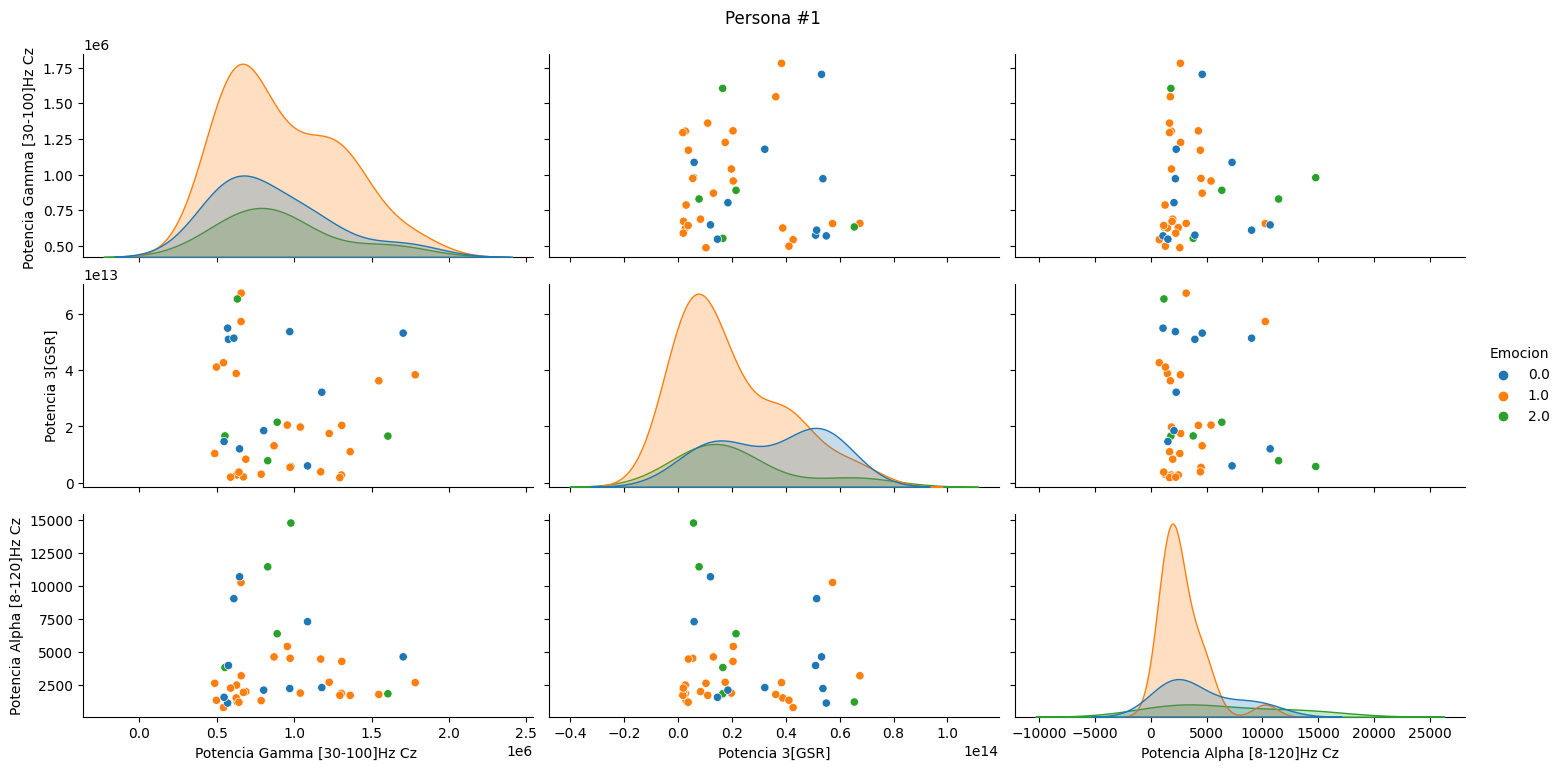

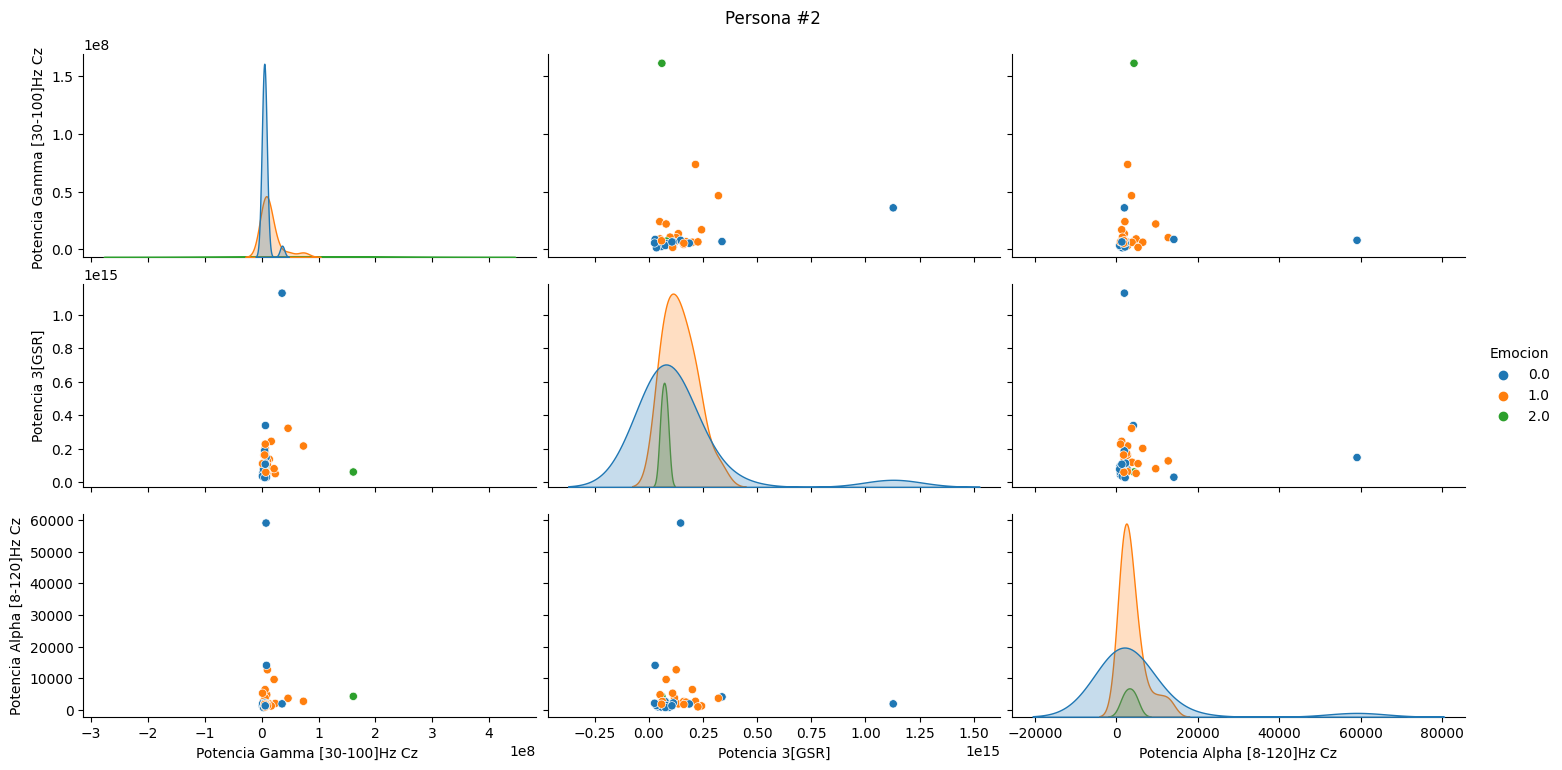

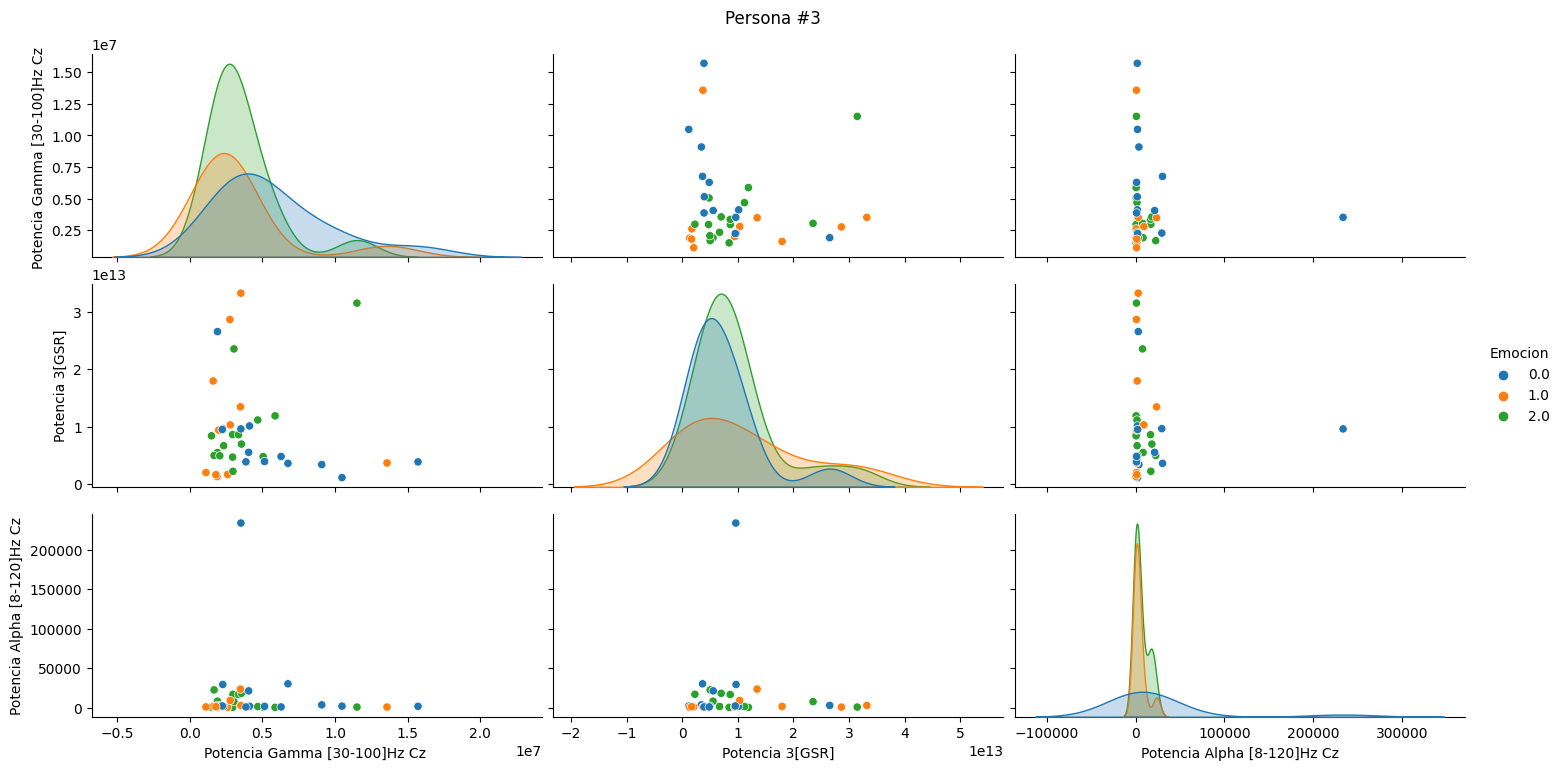

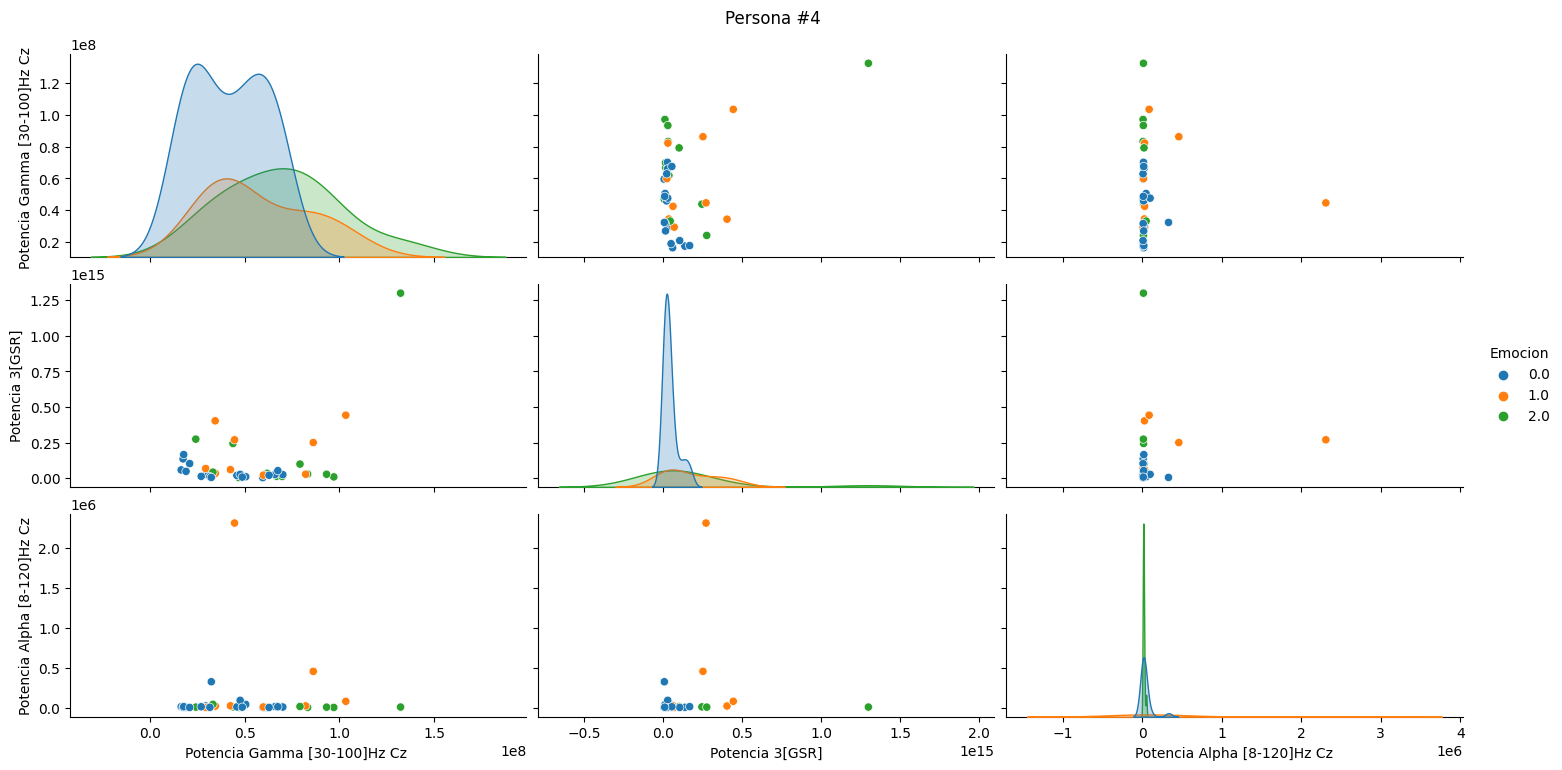

In [ ]:
import random

# Filtrar las columnas que no contienen la palabra 'frecuencia' y mostrar otra información de mayor relevancia.
columnas_permitidas = [columna for columna in Nombres if 'Frecuencia' not in columna]

# Elegir 7 columnas aleatorias de las permitidas
aleatorio = random.sample(columnas_permitidas, 3)
aleatorio.append('Emocion')

# Declaración inicial para los primeros 40 vídeos.
a=0
b=39

# Imprimir las columnas seleccionadas
print ("Las características escogidas fueron: {}\n".format(aleatorio))

# Se hace un for para cada una de las personas.
for i in range (0,4):

  # Establecimiento de los rangos para los vídeos de las otras personas.
  newDATA1 = dataFrame_total.loc[a:b, aleatorio]

  # Graficación del pairplot.
  figpair = sns.pairplot(newDATA1, hue='Emocion', aspect=2)
  figpair.fig.suptitle('Persona #{}'.format(i+1), y=1.02)

  # Aumento de valor para los vídeos de las otras personas.
  a=a+40
  b=b+40

Ahora, luego de haber revisado algunas características de forma aleatoria, hemos tomado unos en específico que pueden brindarnos una mejor visibilidad de las emociones y poder distinguir algún tipo de patrón que pueda darnos mayor información.

Las características escogidas fueron ['Promedio [Temp]', 'Varianza [vEOG]', 'Promedio [tEMG]', 'Potencia en banda [0.2-0.3]Hz [HRV]', 'Promedio [hEOG]', 'Potencia Alpha [8-120]Hz O1', 'Potencia 8 [Respiración]']


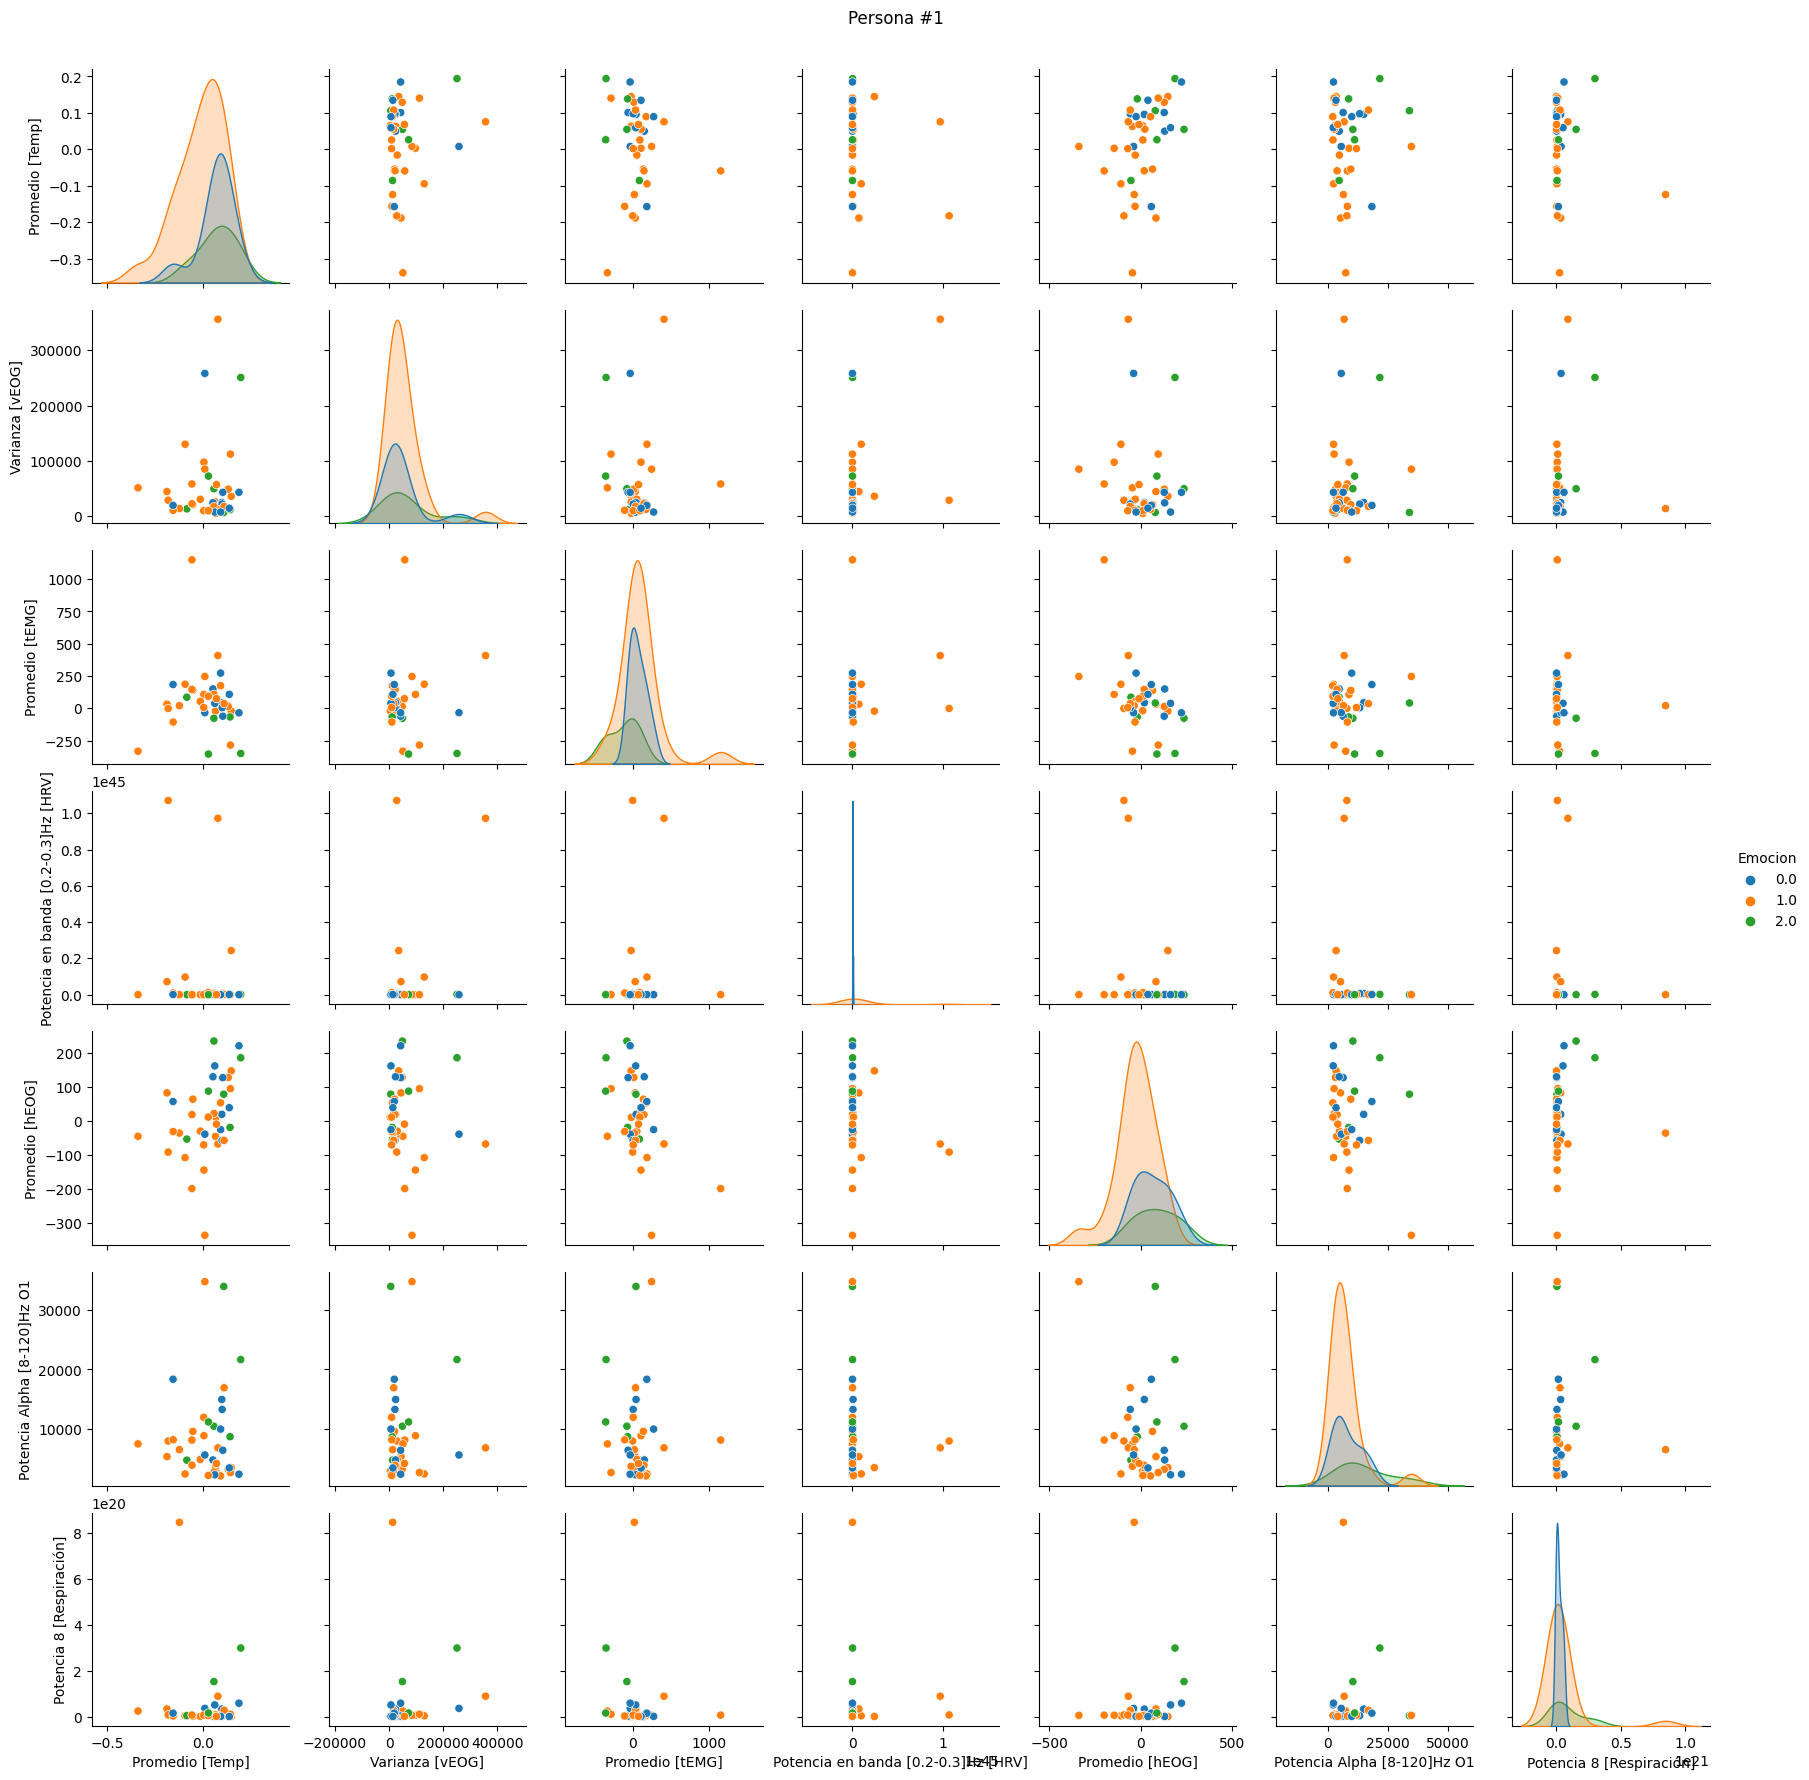

In [ ]:
newDATA_P1 = dataFrame_total.loc[0:39, ['Promedio [Temp]', 'Varianza [vEOG]', 'Promedio [tEMG]', 'Potencia en banda [0.2-0.3]Hz [HRV]', 'Promedio [hEOG]', 'Potencia Alpha [8-120]Hz O1', 'Potencia 8 [Respiración]', 'Emocion']]
print ("Las características escogidas fueron ['Promedio [Temp]', 'Varianza [vEOG]', 'Promedio [tEMG]', 'Potencia en banda [0.2-0.3]Hz [HRV]', 'Promedio [hEOG]', 'Potencia Alpha [8-120]Hz O1', 'Potencia 8 [Respiración]']")

figpair = sns.pairplot(newDATA_P1, hue='Emocion')
figpair.fig.suptitle('Persona #1',y=1.02);

En general, la tarea de identificar patrones o comportamientos distintivos que permitan diferenciar una emoción específica resulta ser un desafío considerable. No obstante, a medida que profundizamos en el análisis de los datos, se han revelado algunas gráficas que arrojan luz sobre esta compleja tarea.

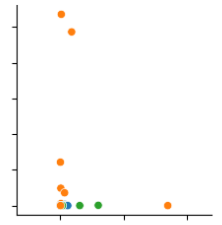

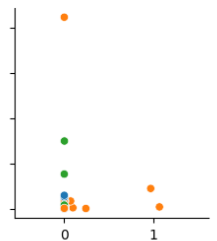

Estas gráficas representan un avance significativo en nuestro enfoque, ya que revelan una distribución de puntos que, aunque presenta cierta superposición, también exhibe diferenciación. Este fenómeno es crucial para un análisis más exhaustivo de las características emocionales y la capacidad de discernir con precisión una emoción de otra. La presencia de estos patrones distintivos en las gráficas puede ser interpretada como indicios de la existencia de correlaciones significativas entre ciertas características y emociones particulares.

Esta diferenciación observable en las gráficas sugiere que ciertos rasgos o indicadores específicos están relacionados de manera más prominente con ciertas emociones, lo que brinda la oportunidad de desarrollar modelos más precisos para detectar y clasificar emociones. Sin embargo, es importante tener en cuenta que, al revisar las gráficas de otras características, no encontramos un patrón claro ni diferenciación evidente. Esto puede indicar que algunas emociones pueden estar influenciadas por una variedad de factores más complejos o que no se reflejan de manera directa en las características analizadas.

En última instancia, este enfoque de análisis más detallado y selectivo de las gráficas nos permite avanzar hacia una comprensión más profunda de la relación entre las características emocionales y las emociones en sí. A medida que continuamos investigando y refinando nuestros métodos de análisis, es posible que podamos identificar patrones adicionales y mejorar nuestra capacidad para distinguir y comprender las emociones humanas de manera más precisa.

Las características escogidas fueron ['Promedio [Temp]', 'Varianza [vEOG]', 'Promedio [tEMG]', 'Potencia en banda [0.2-0.3]Hz [HRV]', 'Promedio [hEOG]', 'Potencia Alpha [8-120]Hz O1', 'Potencia 8 [Respiración]']


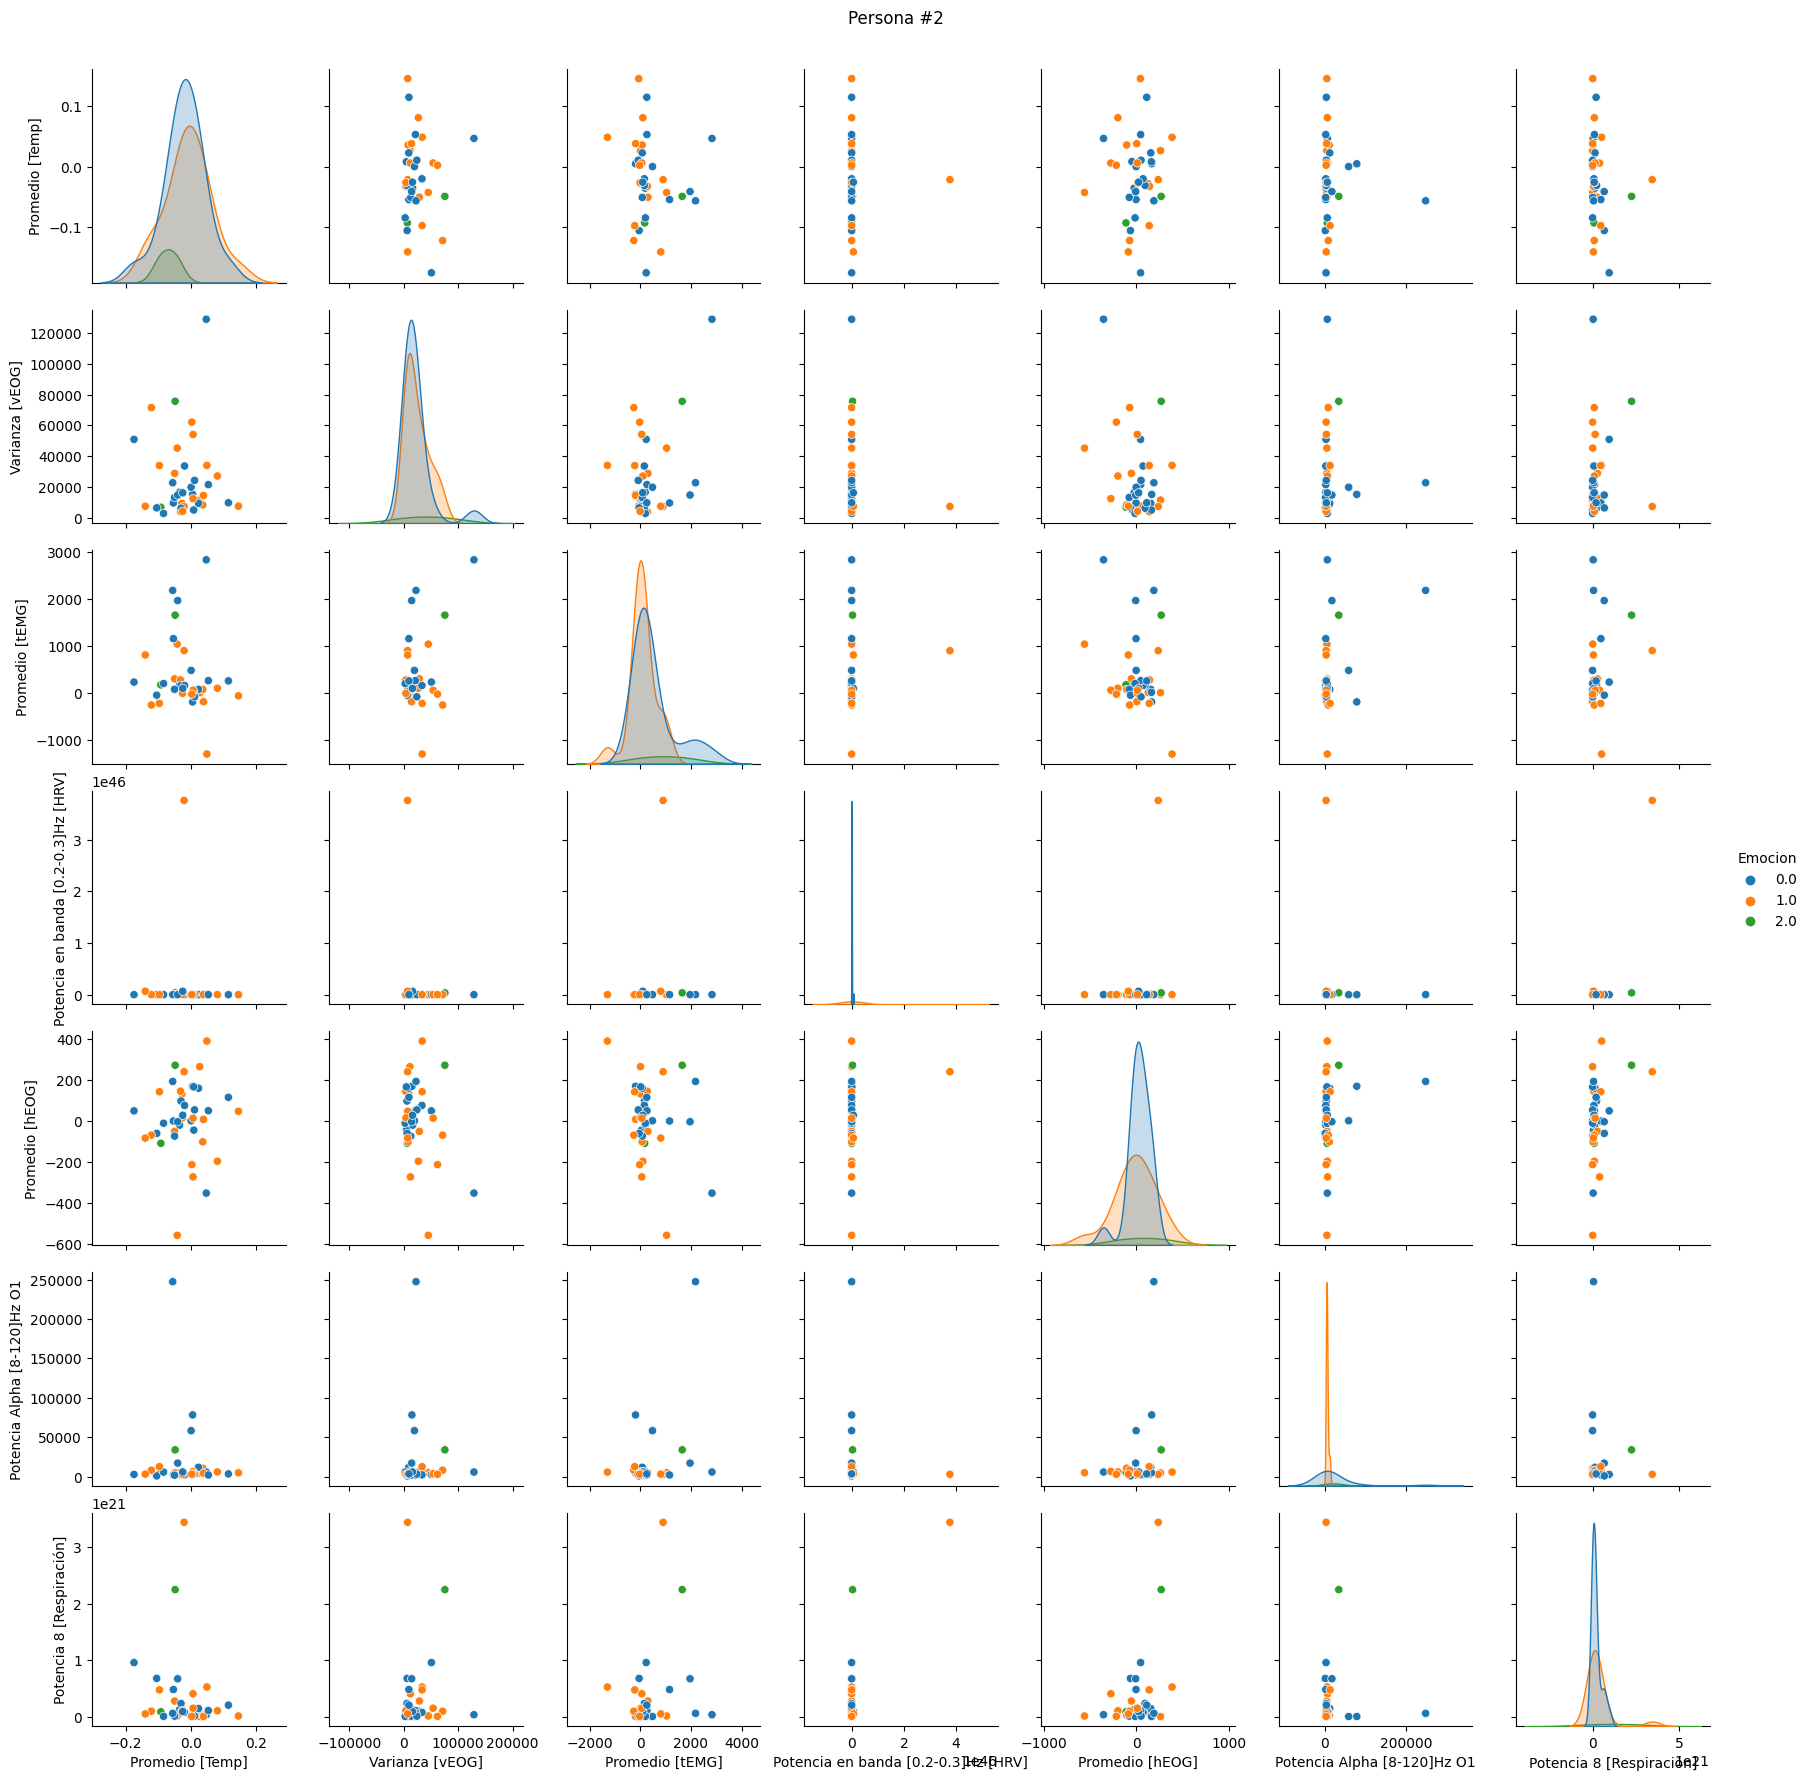

In [ ]:
newDATA_P2 = dataFrame_total.loc[40:79, ['Promedio [Temp]', 'Varianza [vEOG]', 'Promedio [tEMG]', 'Potencia en banda [0.2-0.3]Hz [HRV]', 'Promedio [hEOG]', 'Potencia Alpha [8-120]Hz O1', 'Potencia 8 [Respiración]', 'Emocion']]
print ("Las características escogidas fueron ['Promedio [Temp]', 'Varianza [vEOG]', 'Promedio [tEMG]', 'Potencia en banda [0.2-0.3]Hz [HRV]', 'Promedio [hEOG]', 'Potencia Alpha [8-120]Hz O1', 'Potencia 8 [Respiración]']")

figpair = sns.pairplot(newDATA_P2, hue='Emocion')
figpair.fig.suptitle('Persona #2',y=1.02);

En el análisis de esta persona, no podemos evidenciar ninguna diferenciación en los patrones de los datos, lo que incluye aspectos como la valencia y otras características emocionales. La falta de patrones claros en estas gráficas sugiere que las emociones expresadas por esta persona pueden ser más complejas o menos predecibles en relación con las características evaluadas.

En particular, la valencia, que representa el grado de positividad o negatividad de una emoción, no muestra una tendencia distintiva. Esto implica que las emociones expresadas pueden oscilar entre lo positivo y lo negativo sin una pauta definida.

En conjunto, la ausencia de patrones y diferenciación en estas características dificulta la determinación concluyente de cómo se relacionan las emociones con las características analizadas en el caso de esta persona en particular. Esto podría deberse a una variedad de factores, como la individualidad emocional, las circunstancias específicas en las que se recopilaron los datos o incluso la complejidad inherente de las emociones humanas. Para obtener una comprensión más precisa, podrían ser necesarios análisis adicionales o una exploración más profunda de las experiencias y contextos emocionales de esta persona.

Las características escogidas fueron ['Potencia 9 [Respiración]', 'Potencia 1 [GSR]', 'Espectro de potencia en [0.1-0.2]Hz [Temp]', 'Potencia Alpha [8-120]Hz Fz', 'Energía [hEOG]', 'Potencia Beta [12-30]Hz O1','Potencia en banda [0.2-0.3]Hz [HRV]'



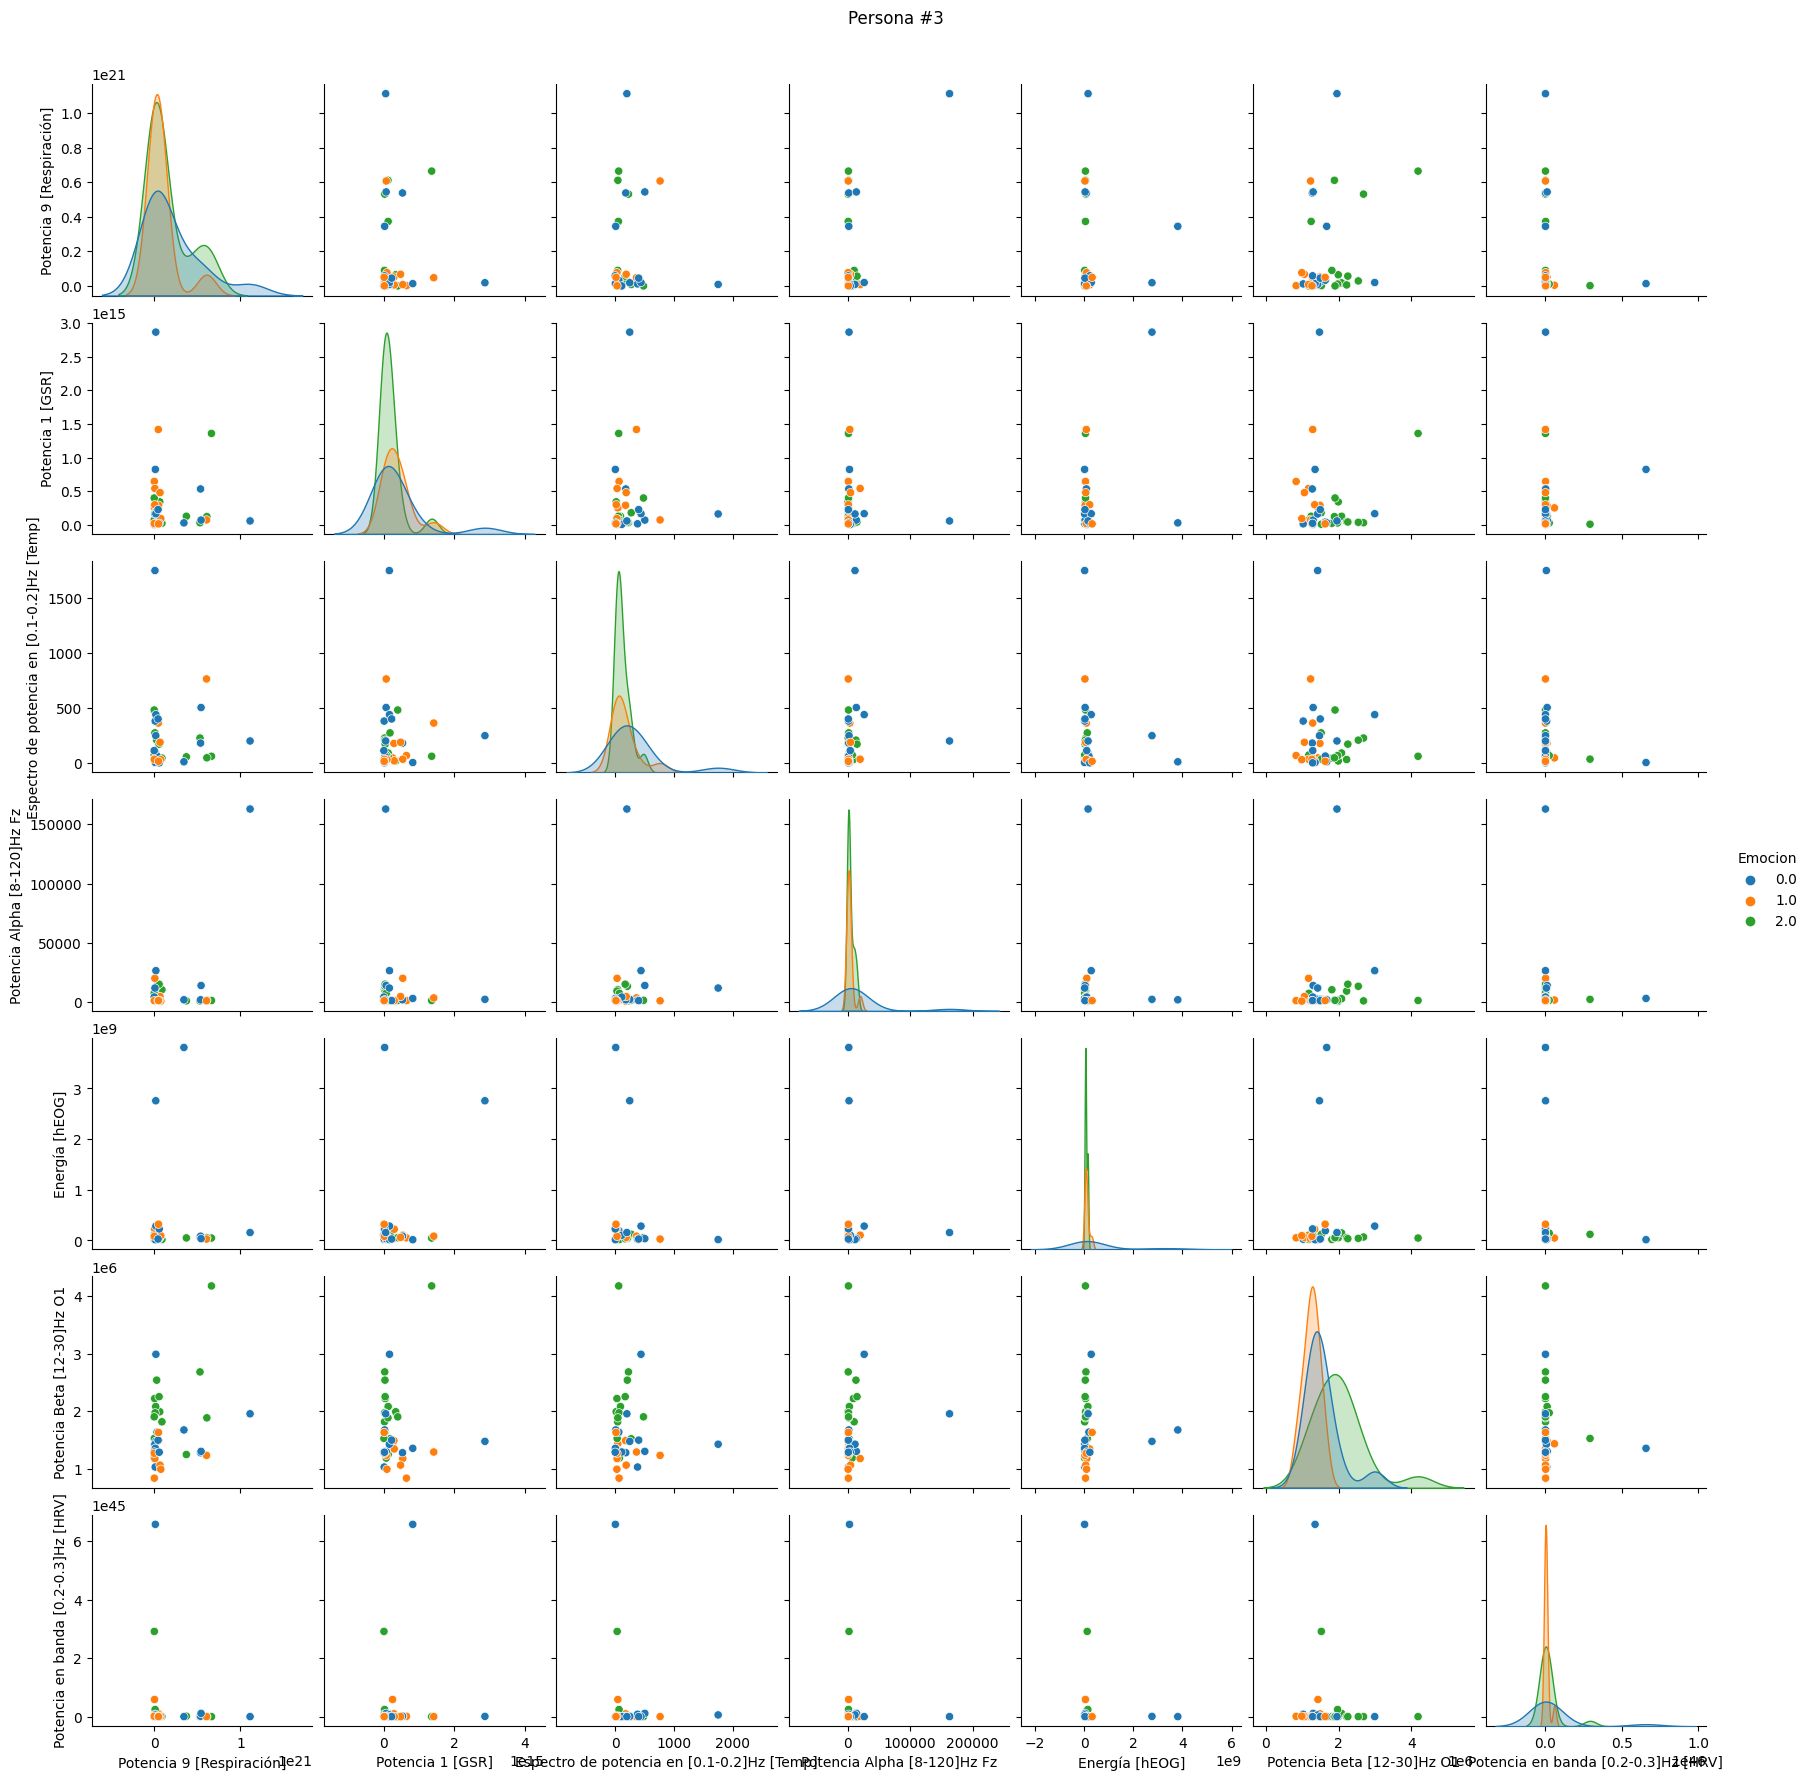

In [ ]:
newDATA_P3 = dataFrame_total.loc[80:119, ['Potencia 9 [Respiración]', 'Potencia 1 [GSR]', 'Espectro de potencia en [0.1-0.2]Hz [Temp]', 'Potencia Alpha [8-120]Hz Fz', 'Energía [hEOG]', 'Potencia Beta [12-30]Hz O1', 'Potencia en banda [0.2-0.3]Hz [HRV]', 'Emocion']
]
print ("Las características escogidas fueron ['Potencia 9 [Respiración]', 'Potencia 1 [GSR]', 'Espectro de potencia en [0.1-0.2]Hz [Temp]', 'Potencia Alpha [8-120]Hz Fz', 'Energía [hEOG]', 'Potencia Beta [12-30]Hz O1','Potencia en banda [0.2-0.3]Hz [HRV]'\n")

figpair = sns.pairplot(newDATA_P3, hue='Emocion')
figpair.fig.suptitle('Persona #3',y=1.02);

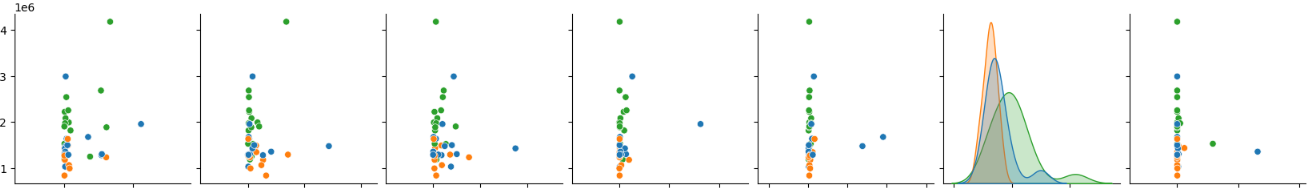

Continuando con el análisis de la tercera persona, observamos que las gráficas revelan un patrón interesante en el que los puntos tienden a agruparse en áreas específicas. Aunque hay algunas muestras anormales que se destacan, esta tendencia de agrupación sugiere la presencia de patrones emocionales subyacentes. Es decir, existe una cierta coherencia en la forma en que esta persona experimenta y expresa sus emociones a través de las características analizadas.

Este fenómeno de agrupación es un hallazgo prometedor, ya que sugiere que estos grupos de puntos pueden representar categorías emocionales o estados afectivos específicos. Cada agrupación podría corresponder a un conjunto de características que se manifiestan de manera similar cuando la persona experimenta una emoción particular. Esto proporciona una base sólida para realizar un análisis más detallado y profundo de estos datos.

A partir de esta agrupación identificada en las gráficas, es posible llevar a cabo un análisis más exhaustivo y preciso. Esto podría implicar la identificación de patrones específicos en las características emocionales que corresponden a cada grupo de puntos. Además, se podrían utilizar algoritmos de aprendizaje automático y técnicas de análisis de datos para caracterizar y clasificar las emociones representadas por cada agrupación.

Este enfoque podría llevar a una caracterización más completa de las emociones de la persona en cuestión, proporcionando información valiosa sobre cómo experimenta y expresa sus sentimientos. Además, podría ser útil en la creación de modelos predictivos que permitan identificar y predecir las emociones futuras de esta persona en función de sus características emocionales observadas.

Las características escogidas fueron ['Potencia Alpha [8-120]Hz Fz', 'Ratio entre las bandas [0.05-0.25]Hz y [0.25-5]Hz [Respiración]', 'Energía [vEOG]', 'Potencia Gamma [30-100]Hz T7 ', 'Potencia 7[GSR]', 'Potencia Gamma [30-100]Hz O1 ', 'Potencia 6[GSR]', 'Emocion']


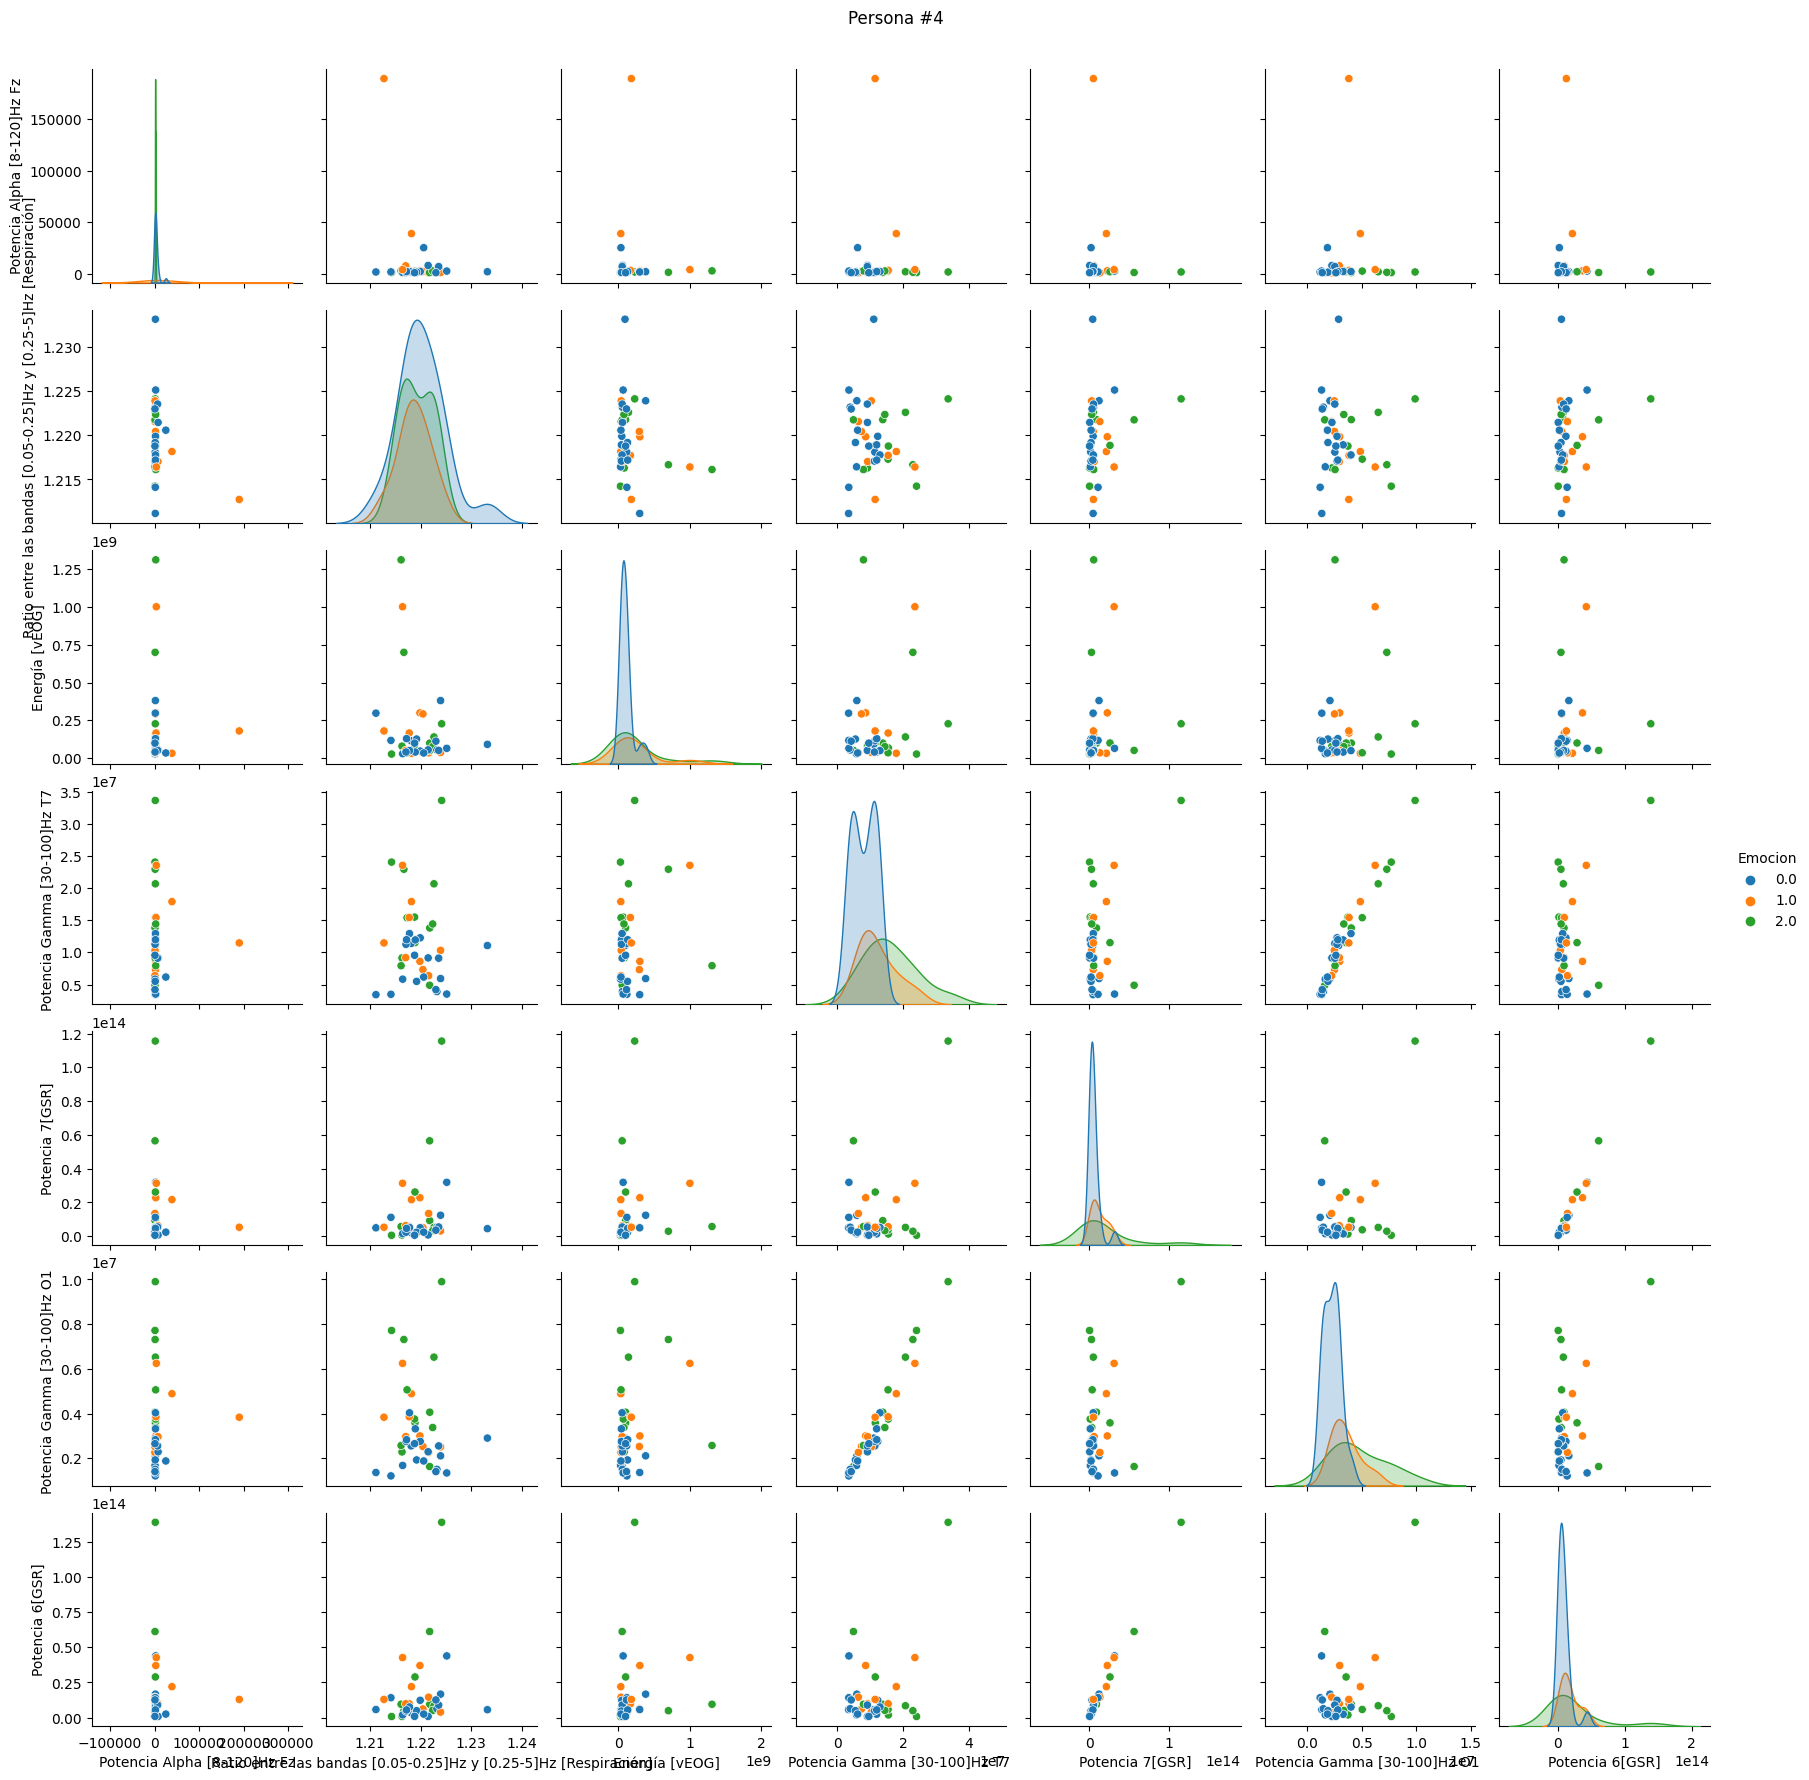

In [ ]:
newDATA_P4 = dataFrame_total.loc[120:159, ['Potencia Alpha [8-120]Hz Fz', 'Ratio entre las bandas [0.05-0.25]Hz y [0.25-5]Hz [Respiración]', 'Energía [vEOG]', 'Potencia Gamma [30-100]Hz T7 ', 'Potencia 7[GSR]', 'Potencia Gamma [30-100]Hz O1 ', 'Potencia 6[GSR]', 'Emocion']
]
print ("Las características escogidas fueron ['Potencia Alpha [8-120]Hz Fz', 'Ratio entre las bandas [0.05-0.25]Hz y [0.25-5]Hz [Respiración]', 'Energía [vEOG]', 'Potencia Gamma [30-100]Hz T7 ', 'Potencia 7[GSR]', 'Potencia Gamma [30-100]Hz O1 ', 'Potencia 6[GSR]', 'Emocion']")

figpair = sns.pairplot(newDATA_P4, hue='Emocion')
figpair.fig.suptitle('Persona #4',y=1.02);

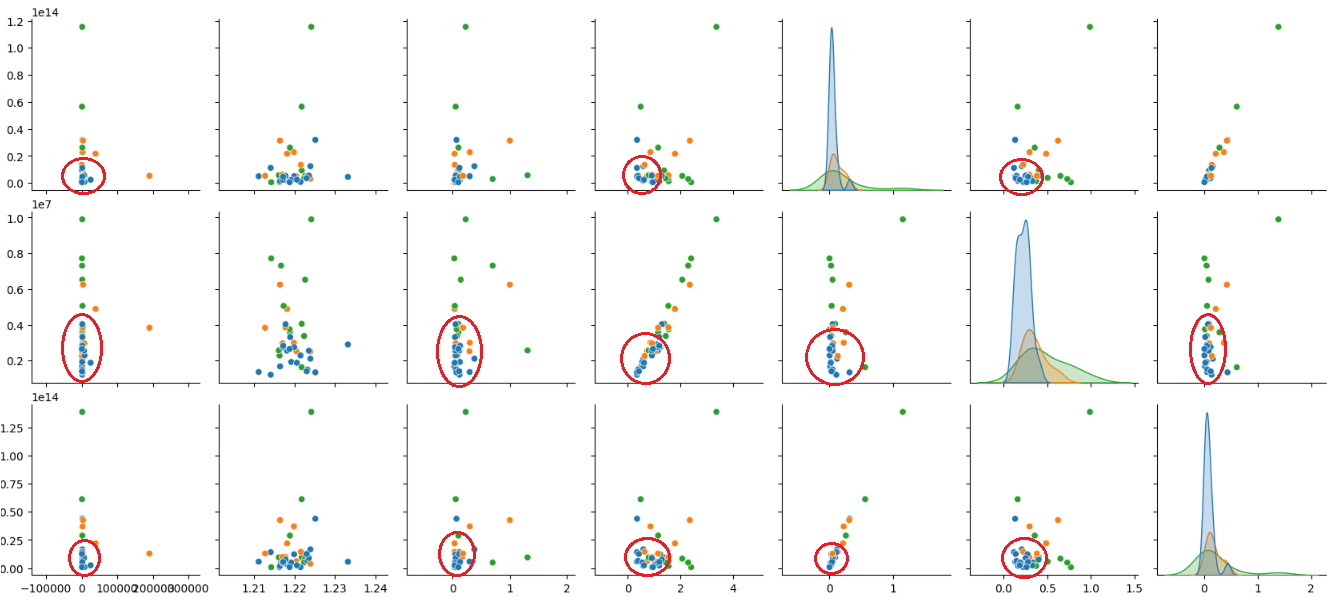

En el análisis de esta persona, hemos identificado un hallazgo particularmente interesante: existe una mayor concentración de la emoción 0, que está asociada con bajos niveles de valencia, esto corresponde a emociones y estados afectivos que se perciben como desagradables, tristes, enojados, ansiosos, o cualquier otro sentimiento que tenga una connotación negativa. Por ejemplo, la tristeza, el miedo, la ira y la aversión son emociones que suelen asociarse con un bajo nivel de valencia. Es evidente que los datos relacionados con esta emoción están más densamente agrupados en comparación con los otros valores emocionales, que exhiben una dispersión más amplia. Este patrón es esencialmente útil ya que ofrece la posibilidad de realizar un reconocimiento más preciso de esta emoción específica, lo que a su vez facilita la identificación de los estados emocionales de la persona.

La concentración de datos alrededor de la emoción 0 indica que esta persona tiende a experimentar con mayor frecuencia estados emocionales caracterizados por un bajo nivel de valencia. Esto puede tener implicaciones importantes para comprender su respuesta emocional en diferentes situaciones. Por ejemplo, podría sugerir que la persona es más propensa a sentir emociones como la depresión, la aburrición o el cansancio en comparación con estados emocionales más intensos o excitados.

La capacidad de reconocer y distinguir con precisión esta emoción particular en los datos es valiosa, ya que permite una comprensión más detallada del estado emocional predominante de la persona en un momento dado. Además, esta información podría utilizarse para desarrollar estrategias de intervención o apoyo emocional específicas en función de las necesidades emocionales identificadas.

## Conclusiones

- En general, a pesar de contar con una variedad de características fisiológicas y datos recopilados para analizar las emociones humanas, es importante destacar que aún es necesario realizar un análisis más detallado y cauteloso. No podemos afirmar de manera concluyente qué emoción está experimentando una persona basándonos únicamente en un conjunto de datos. En lugar de ello, podemos obtener un acercamiento o una visión aproximada de su estado emocional.

  Una de las razones fundamentales para esta cautela es la dispersión de los datos. Las respuestas emocionales varían significativamente entre individuos y pueden ser influenciadas por una amplia gama de factores, como el contexto, la cultura, las experiencias personales y las diferencias genéticas. Esta variabilidad puede dar lugar a superposición de datos y dificultades para atribuir una emoción específica a un patrón particular.

  Además, las emociones humanas son inherentemente complejas y multifacéticas. A menudo, una única emoción puede manifestarse de diversas maneras, y diferentes emociones pueden compartir características similares en términos de respuestas fisiológicas y comportamentales. Esto complica aún más la tarea de determinar con certeza cuál es la emoción que una persona está sintiendo en un momento dado.

  En lugar de buscar una conclusión definitiva, el análisis de datos emocionales se enfoca en identificar patrones, tendencias y agrupaciones de respuestas emocionales que pueden indicar ciertas tendencias emocionales. Esto puede proporcionar información valiosa sobre cómo una persona puede estar experimentando un rango de emociones, aunque no necesariamente nos dé una respuesta definitiva sobre una emoción particular.

- La identificación de agrupaciones de emociones en los datos fisiológicos y comportamentales es esencial para caracterizar mejor las respuestas emocionales. Estas agrupaciones sugieren que ciertas emociones comparten características subyacentes.

  Al reconocer patrones de agrupación, podemos empezar a entender las emociones como miembros de "familias emocionales". Esto implica que emociones similares pueden tener perfiles fisiológicos y psicológicos similares.

  La identificación de patrones en las agrupaciones de emociones puede servir como base para desarrollar modelos de reconocimiento emocional más precisos. Estos modelos pueden ayudar en la identificación y clasificación de las emociones en tiempo real.

- El arousal es una dimensión esencial que nos permite evaluar la intensidad de una emoción. En esencia, nos indica cuán "cargada" o activada está una respuesta emocional. Esto significa que podemos distinguir entre emociones que van desde estados emocionales muy calmados o apacibles hasta estados emocionales altamente excitados o intensos.

  Las medidas fisiológicas que hemos caracterizado en este proyecto han desempeñado un papel importante en la evaluación de las emociones pues hemos podido ver que con ciertas características, éstas medidas fisiológicas proporcionan evidencia objetiva de la activación emocional.

  La valencia, por otro lado, se refiere a la polaridad positiva o negativa de una emoción. Nos permite discernir si una emoción es placentera o desagradable. La valencia es fundamental para comprender la calidad emocional de una experiencia.

  Es importante destacar que el arousal y la valencia no son dimensiones mutuamente excluyentes; más bien, trabajan en conjunto para proporcionar una comprensión completa de las emociones. Por ejemplo, podemos tener emociones positivas de alta intensidad (alto arousal), como la euforia, o emociones negativas de baja intensidad (bajo arousal), como la tristeza. La combinación de ambas dimensiones nos permite crear un mapa emocional más detallado y preciso.

- Limitaciones en el Análisis de Sentimientos: Es importante destacar que el análisis de sentimientos basado en medidas fisiológicas no siempre es concluyente (como en este caso). Como mencionamos previamente, las respuestas fisiológicas pueden variar significativamente entre individuos y pueden verse influenciadas por factores contextuales. Como vimos por ejemplo en la última persona, donde una mayor concentración de cierta emoción puede indicar algún tipo de predisposición a cierto tipos de emociones.

- Importancia de la Integración de Datos: Para obtener una comprensión más completa de las emociones, es esencial integrar múltiples medidas fisiológicas y contextuales. Esto puede proporcionar una visión más precisa de cómo el cuerpo y la mente responden a las emociones.

- Perspectivas para el Futuro: A pesar de las limitaciones, la extracción y el análisis de estas características fisiológicas son un paso importante hacia la comprensión de las emociones humanas. El desarrollo de algoritmos de aprendizaje automático y técnicas avanzadas de procesamiento de datos puede mejorar la capacidad de analizar y predecir las respuestas emocionales.

- La comprensión de las respuestas emocionales a nivel fisiológico tiene aplicaciones potenciales en la terapia y el tratamiento de trastornos emocionales como la ansiedad y la depresión. Las medidas fisiológicas pueden ser útiles en la evaluación y el seguimiento de la salud mental.

- Interacción Humano-Computadora: La capacidad de detectar y comprender las emociones a través de medidas fisiológicas es fundamental para el desarrollo de sistemas de interacción humano-computadora más intuitivos y empáticos, que pueden adaptarse a las necesidades emocionales de los usuarios.